Load Libraries

In [1]:
!pip install missingno

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: pytorch-lightning 1.5.10 has a non-standard dependency specifier torch>=1.7.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [2]:
# Python libraries
# Classic,data manipulation and linear algebra

import pandas as pd
import numpy as np

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
import missingno as msno

# Data processing, metrics and modeling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score, roc_auc_score
#from imblearn.over_sampling import SMOTE

# Machine Learning Libraries

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier


# Display Settings

pd.set_option("display.width", 500)
pd.set_option("display.max_columns", 25)

In [3]:
#Libraries for classifiers
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, recall_score
from sklearn import metrics

In [4]:
#importing necessary libraries into our code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection
%matplotlib inline

In [5]:
import pandas as pd
import numpy as np

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff



# Data processing, metrics and modeling
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score

from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict


# Stats
import scipy.stats as ss
from scipy import interp
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform


#ignore warning messages 
import warnings
warnings.filterwarnings('ignore')

### Read the dataset

In [6]:
#loading our dataset
DataPath = ('statlog.csv')
data = pd.read_csv(DataPath)
print(data.head())
data.shape

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  slope   ca  thal  presence
0  70.0  1.0  4.0     130.0  322.0  0.0      2.0    109.0    0.0      2.4    2.0  3.0   3.0         2
1  67.0  0.0  3.0     115.0  564.0  0.0      2.0    160.0    0.0      1.6    2.0  0.0   7.0         1
2  57.0  1.0  2.0     124.0  261.0  0.0      0.0    141.0    0.0      0.3    1.0  0.0   7.0         2
3  64.0  1.0  4.0     128.0  263.0  0.0      0.0    105.0    1.0      0.2    2.0  1.0   7.0         1
4  74.0  0.0  2.0     120.0  269.0  0.0      2.0    121.0    1.0      0.2    1.0  1.0   3.0         1


(270, 14)

### Exploratory Data Analysis (EDA)

In [7]:
target_col = ["presence"]
cat_cols   = data.nunique()[data.nunique() < 3].keys().tolist()
print(cat_cols)
cat_cols   = [x for x in cat_cols ]
print(cat_cols)
#numerical columns
num_cols   = [x for x in data.columns if x not in cat_cols + target_col]
print(num_cols)
#Binary columns with 2 values
bin_cols   = data.nunique()[data.nunique() == 2].keys().tolist()
print(bin_cols)
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]
print(multi_cols)

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    data[i] = le.fit_transform(data[i])
    
#Duplicating columns for multi value columns
data = pd.get_dummies(data = data,columns = multi_cols )
print(data)

#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(data[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#dropping original values merging scaled values for numerical columns
df_data_og = data.copy()
data = data.drop(columns = num_cols,axis = 1)
data = data.merge(scaled,left_index=True,right_index=True,how = "left")

['sex', 'fbs', 'exang', 'presence']
['sex', 'fbs', 'exang', 'presence']
['age', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'oldpeak', 'slope', 'ca', 'thal']
['sex', 'fbs', 'exang', 'presence']
[]
      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  slope   ca  thal  presence
0    70.0    1  4.0     130.0  322.0    0      2.0    109.0      0      2.4    2.0  3.0   3.0         1
1    67.0    0  3.0     115.0  564.0    0      2.0    160.0      0      1.6    2.0  0.0   7.0         0
2    57.0    1  2.0     124.0  261.0    0      0.0    141.0      0      0.3    1.0  0.0   7.0         1
3    64.0    1  4.0     128.0  263.0    0      0.0    105.0      1      0.2    2.0  1.0   7.0         0
4    74.0    0  2.0     120.0  269.0    0      2.0    121.0      1      0.2    1.0  1.0   3.0         0
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...    ...  ...   ...       ...
265  52.0    1  3.0     172.0  199.0    1      0.0    162.0      0     

In [8]:
#split the dataset into x and y values
#x-independent variables
#y-dependent variables
#y = data['presence']
#X = data.drop('presence',axis=1)


In [9]:
import numpy as np
import random
from datetime import datetime

In [10]:
data.head(20)

,sex,fbs,exang,presence,age,cp,trestbps,chol,restecg,thalach,oldpeak,slope,ca,thal
0,1,0,0,1,1.712094,0.870928,-0.075410,1.402212,0.981664,-1.759208,1.181012,0.676419,2.472682,-0.875706
1,0,0,0,0,1.382140,-0.183559,-0.916759,6.093004,0.981664,0.446409,0.481153,0.676419,-0.711535,1.189277
2,1,0,0,1,0.282294,-1.238045,-0.411950,0.219823,-1.026285,-0.375291,-0.656118,-0.954234,-0.711535,1.189277
3,1,0,1,0,1.052186,0.870928,-0.187590,0.258589,-1.026285,-1.932198,-0.743600,0.676419,0.349871,1.189277
4,0,0,1,0,2.152032,-1.238045,-0.636310,0.374890,0.981664,-1.240239,-0.743600,-0.954234,0.349871,-0.875706
5,1,0,0,0,1.162171,0.870928,-0.636310,-1.408386,-1.026285,-0.418539,-0.568636,-0.954234,-0.711535,1.189277
6,1,1,1,1,0.172309,-0.183559,-0.075410,0.122905,0.981664,-0.332044,-0.393671,0.676419,0.349871,0.673032
7,1,0,1,1,0.502263,0.870928,-1.197209,-0.206613,0.981664,-0.332044,0.131224,0.676419,0.349871,1.189277
8,1,0,0,1,0.612248,0.870928,0.485490,0.840093,0.981664,0.878883,0.131224,0.676419,1.411276,1.189277
9,0,0,0,1,0.942201,0.870928,1.046389,3.049805,0.981664,0.186925,2.580731,0.676419,2.472682,1.189277


In [11]:
import pandas as pd
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier
from scipy.stats.stats import pearsonr 
import matplotlib.pyplot as mp
import seaborn as sb
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import  LabelEncoder
from sklearn.linear_model import SGDClassifier

In [12]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [13]:
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [14]:
import random
import math # cos() for Rastrigin
import copy # array-copying convenience
import sys	 # max float

In [15]:
def median_target(var):   
    temp = data[data[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [16]:
target_col = ["Outcome"]
cat_cols   = data.nunique()[data.nunique() < 12].keys().tolist()
cat_cols   = [x for x in cat_cols ]
#numerical columns
num_cols   = [x for x in data.columns if x not in cat_cols + target_col]
#Binary columns with 2 values
bin_cols   = data.nunique()[data.nunique() == 2].keys().tolist()

#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    data[i] = le.fit_transform(data[i])
    
#Duplicating columns for multi value columns
data = pd.get_dummies(data = data,columns = multi_cols )

#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(data[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#dropping original values merging scaled values for numerical columns
df_data_og = data.copy()
data = data.drop(columns = num_cols,axis = 1)
data = data.merge(scaled,left_index=True,right_index=True,how = "left")

In [17]:
df = data.copy()

In [18]:
df.head(50)

,sex,fbs,exang,presence,cp_-2.2925315260057726,cp_-1.238045134146218,cp_-0.18355874228666322,cp_0.8709276495728916,restecg_-1.0262847209822685,restecg_-0.022310537412657934,restecg_0.9816636461569526,slope_-0.9542343395562983,...,ca_-0.7115349394446727,ca_0.3498707713291484,ca_1.4112764821029693,ca_2.4726821928767904,thal_-0.8757058119953168,thal_0.6730315410968375,thal_1.189277325460889,age,trestbps,chol,thalach,oldpeak
0,1,0,0,1,0,0,0,1,0,0,1,0,...,0,0,0,1,1,0,0,1.712094,-0.075410,1.402212,-1.759208,1.181012
1,0,0,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,1,1.382140,-0.916759,6.093004,0.446409,0.481153
2,1,0,0,1,0,1,0,0,1,0,0,1,...,1,0,0,0,0,0,1,0.282294,-0.411950,0.219823,-0.375291,-0.656118
3,1,0,1,0,0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,1,1.052186,-0.187590,0.258589,-1.932198,-0.743600
4,0,0,1,0,0,1,0,0,0,0,1,1,...,0,1,0,0,1,0,0,2.152032,-0.636310,0.374890,-1.240239,-0.743600
5,1,0,0,0,0,0,0,1,1,0,0,1,...,1,0,0,0,0,0,1,1.162171,-0.636310,-1.408386,-0.418539,-0.568636
6,1,1,1,1,0,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0.172309,-0.075410,0.122905,-0.332044,-0.393671
7,1,0,1,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,1,0.502263,-1.197209,-0.206613,-0.332044,0.131224
8,1,0,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0.612248,0.485490,0.840093,0.878883,0.131224
9,0,0,0,1,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,1,0.942201,1.046389,3.049805,0.186925,2.580731


In [19]:
y = data['presence'].values
X = data.drop('presence',axis=1).values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modified Bee Algorithm 

In [21]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

def calculate_auc(y_true, y_pred):
    return roc_auc_score(y_true, y_pred)

def calculate_fitness(ensemble, X_train, y_train):
    ensemble_predictions = get_ensemble_predictions(ensemble, X_train)
    if len(ensemble_predictions) == 0:
        return float('-inf')  # Return negative infinity if the ensemble predictions are empty
    else:
        AUC_ens = calculate_auc(y_train, ensemble_predictions)

    M = len(ensemble)
    AUC_i = [calculate_auc(y_train, get_classifier_predictions(classifier, X_train)) for classifier in ensemble]
    AUC_mean = np.mean(AUC_i)

    Q_values, P_values, DF_values = [], [], []

    for i in range(M - 1):
        for j in range(i + 1, M):
            Q_ij, P_ij, DF_ij = calculate_pairwise_diversity(ensemble[i], ensemble[j], X_train, y_train)
            Q_values.append(Q_ij)
            P_values.append(P_ij)
            DF_values.append(DF_ij)

    Q_avg = np.mean(Q_values)
    P_avg = np.mean(P_values)
    DF_avg = np.mean(DF_values)

    k = 1
    ensemble_fitness = AUC_ens - k * (Q_avg + P_avg + DF_avg)

    return ensemble_fitness


def get_classifier_predictions(classifier, X_train):
    return classifier.predict_proba(X_train)[:, 1]

def get_ensemble_predictions(ensemble, X_train):
    return np.mean([get_classifier_predictions(classifier, X_train) for classifier in ensemble], axis=0)

def calculate_pairwise_diversity(classifier_i, classifier_j, X_train, y_train):
    Q_ij, P_ij, DF_ij = np.random.rand(), np.random.rand(), np.random.rand()
    return Q_ij, P_ij, DF_ij

def rsb_algorithm(pool_size, M, scout_bees, X_train, y_train, classifiers):
    if len(classifiers) < M:
        return []

    n = scout_bees
    pool = np.arange(pool_size)
    best_ensemble = None
    best_fitness_pe = float('-inf')

    for i in range(1, n + 1):
        bee_i = np.random.choice(pool, size=1)
        best_ensemble = [classifiers[bee_i[0]]]
        fitness_pe = float('-inf')
        best_fitness = float('-inf')

        for j in range(1, M + 1):
            previous_ensemble = best_ensemble.copy()
            fitness_temp_k = float('-inf')

            for k in range(1, M + 1):
                Ck = np.random.choice(pool, size=1)[0]
                if classifiers[Ck] not in best_ensemble:
                    ensemble_temp_k = best_ensemble.copy()
                    ensemble_temp_k.append(classifiers[Ck])

                    fitness_temp_k = calculate_fitness(ensemble_temp_k, X_train, y_train)

                    if fitness_temp_k > best_fitness:
                        best_ensemble = ensemble_temp_k.copy()
                        best_fitness = fitness_temp_k

            b = np.argmax(best_fitness)
            current_ensemble = [classifiers[pool[b]]]
            fitness_ce = fitness_temp_k

            if len(best_ensemble) < 3 or (fitness_ce > fitness_pe and len(best_ensemble) < 8 * M) or (fitness_ce + sigma > fitness_pe):
                best_ensemble = current_ensemble.copy()
                fitness_pe = fitness_ce
            else:
                best_ensemble = previous_ensemble.copy()
                break

        bee_i = best_ensemble

        print(f"Iteration {i}: Best Ensemble: {best_ensemble}")

    return ensemble_temp_k


def lwmv_algorithm(pool_size, n_ensemble, m, e, nsp, nep, max_gen, X_train, y_train, classifiers):
    best_ensemble = None
    best_fitness = float('-inf')

    for k in range(1, max_gen + 1):
        for i in range(1, e + 1):
            ensemble_i = rsb_algorithm(pool_size, n_ensemble, nsp, X_train, y_train, classifiers)
            fitness_i = calculate_fitness(ensemble_i, X_train, y_train)

            if not np.isnan(fitness_i):  # Check if fitness is not NaN
                if fitness_i > best_fitness:
                    best_fitness = fitness_i
                    best_ensemble = ensemble_i

    return best_ensemble

# Load Pima Indians Diabetes Database (replace with your dataset)
# Assume X_train, X_test, y_train, y_test are already defined
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Placeholder for classifier objects, replace with actual classifiers
classifier1 = SVC(probability=True)
classifier2 = KNeighborsClassifier()
classifier3 = RandomForestClassifier()



# Create an ensemble with valid classifiers
ensemble = [classifier1, classifier2, classifier3]

# Fit each classifier to the training data
for classifier in ensemble:
    classifier.fit(X_train, y_train)

# Example usage:
pool_size = 3  # Number of base classifiers
n_ensemble = 3  # Number of classifiers in each ensemble
m = 5  # Number of ensembles
e = 2  # Number of elite sites
nsp = 2  # Number of bees for each selected site
nep = 1  # Number of bees for the elite site
max_gen = 3  # Number of searching generations

# Convert to numpy arrays
X_train_np = np.array(X_train)
y_train_np = np.array(y_train)

# Run the L-WMV algorithm
result_ensemble = lwmv_algorithm(pool_size, n_ensemble, m, e, nsp, nep, max_gen, X_train_np, y_train_np, ensemble)

# Evaluate the result ensemble
result_predictions = get_ensemble_predictions(result_ensemble, X_test)
result_auc = roc_auc_score(y_test, result_predictions)
result_accuracy = accuracy_score(y_test, np.round(result_predictions))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, np.round(result_predictions))
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate sensitivity, specificity, precision, F1 score, and G-measure
sensitivity = recall_score(y_test, np.round(result_predictions))
specificity = tn / (tn + fp)
precision = precision_score(y_test, np.round(result_predictions))
f1 = f1_score(y_test, np.round(result_predictions))
g_measure = 2 * (sensitivity * specificity) / (sensitivity + specificity)

# Print the results
print("AUC:", result_auc)
print("Accuracy:", result_accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1)
print("G-measure:", g_measure)


Iteration 1: Best Ensemble: [SVC(probability=True)]
Iteration 2: Best Ensemble: [SVC(probability=True)]
Iteration 1: Best Ensemble: [SVC(probability=True)]
Iteration 2: Best Ensemble: [SVC(probability=True)]
Iteration 1: Best Ensemble: [SVC(probability=True)]
Iteration 2: Best Ensemble: [SVC(probability=True)]
Iteration 1: Best Ensemble: [SVC(probability=True)]
Iteration 2: Best Ensemble: [SVC(probability=True)]
Iteration 1: Best Ensemble: [SVC(probability=True)]
Iteration 2: Best Ensemble: [SVC(probability=True)]
Iteration 1: Best Ensemble: [SVC(probability=True)]
Iteration 2: Best Ensemble: [SVC(probability=True)]
AUC: 0.9163059163059162
Accuracy: 0.9074074074074074
Sensitivity: 0.8095238095238095
Specificity: 0.9696969696969697
Precision: 0.9444444444444444
F1 Score: 0.8717948717948718
G-measure: 0.8824006488240065


# Choi et al... SOTA model performance

In [26]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

# Load your Pima Indian Diabetes dataset
# Replace the following lines with your dataset loading logic
# X, y = load_pima_indian_diabetes_dataset()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def generate_base_classifier():
    base_classifier = DecisionTreeClassifier(max_depth=1)
    return base_classifier, 1.0  # You can adjust the weight as needed

def ada_boost_ensemble(T, r):
    N = len(X_train)
    weights = np.ones(N) / N
    ensemble = []

    for t in range(T):
        # Compute distribution for each training sample
        distribution = weights / np.sum(weights)

        # Resample subset
        resampled_indices = np.random.choice(N, size=int(r * N), p=distribution, replace=False)
        resampled_subset = (X_train[resampled_indices], y_train[resampled_indices])

        # Build base classifier
        base_classifier = generate_base_classifier()
        base_classifier.fit(*resampled_subset)

        # Calculate weighted classification error
        y_pred = base_classifier.predict(X_train)
        error = np.sum(weights * (y_pred != y_train))

        # Construct candidate base classifiers
        ensemble.append((base_classifier, 1 / 2 * np.log((1 - error) / error)))

        # Update weights
        weights *= np.exp(-ensemble[-1][1] * y_train * y_pred)
        weights /= np.sum(weights)

    return ensemble

def ensemble_fusion(ensemble, X):
    weighted_predictions = sum(alpha * fit_predict(clf, X) for clf, alpha in ensemble)
    return np.sign(weighted_predictions)

def fit_predict(clf, X):
    # Fit the classifier if it's not fitted and then predict
    if not hasattr(clf, 'fitted_') or not clf.fitted_:
        clf.fit(X_train, y_train)
        clf.fitted_ = True
    return clf.predict(X)


# Ensemble Selection
def calculate_distribution(weights, y_true, y_pred):
    return weights * np.exp(-y_true * y_pred) / np.sum(weights)

def calculate_ensemble_selection_criterion(ensemble, X_valid, y_valid, lambda_value):
    y_ensemble = np.sum(alpha * clf.predict(X_valid) for clf, alpha in ensemble)
    A_mean = np.mean([roc_auc_score(y_valid, clf.predict(X_valid)) for clf, _ in ensemble])
    A_ensemble = roc_auc_score(y_valid, ensemble_fusion(ensemble, X_valid))
    Acc = A_ensemble + (A_ensemble - A_mean)
    Div = calculate_diversity(ensemble)
    normalized_Acc = (Acc - np.min(Acc)) / (np.max(Acc) - np.min(Acc))
    normalized_Div = (Div - np.min(Div)) / (np.max(Div) - np.min(Div))
    return normalized_Acc - lambda_value * normalized_Div

def calculate_diversity(ensemble):
    Q_avg = np.mean([calculate_Q_statistic(hi, hk) for i, (hi, _) in enumerate(ensemble) for j, (hk, _) in enumerate(ensemble) if i < j])
    rho_avg = np.mean([calculate_correlation_coefficient(hi, hk) for i, (hi, _) in enumerate(ensemble) for j, (hk, _) in enumerate(ensemble) if i < j])
    DF_avg = np.mean([calculate_double_fault_measure(hi, hk) for i, (hi, _) in enumerate(ensemble) for j, (hk, _) in enumerate(ensemble) if i < j])
    return Q_avg + rho_avg + DF_avg

def calculate_Q_statistic(hi, hk):
    # Replace with your implementation of Q statistic calculation
    # For example:
    return 2 * (hi * hk) / (hi + hk)

def calculate_correlation_coefficient(hi, hk):
    # Replace with your implementation of correlation coefficient calculation
    # For example:
    return np.corrcoef(hi, hk)[0, 1]

def calculate_double_fault_measure(hi, hk):
    # Replace with your implementation of double-fault measure calculation
    # For example:
    return np.sum((hi == 0) & (hk == 0)) / len(hi)

def calculate_g_measure(precision, recall):
    # Calculate the harmonic mean of precision and recall
    return 2 * (precision * recall) / (precision + recall)

def ensemble_selection(ensemble, X_valid, y_valid, lambda_value):
    selected_ensemble = ensemble.copy()

    for t in range(len(ensemble)):
        # Construct candidate ensembles
        candidate_ensembles = [selected_ensemble + [h] for h in ensemble if h not in selected_ensemble]

        # Check if there are candidate ensembles
        if not candidate_ensembles:
            break

        # Calculate ensemble selection criterion for each candidate ensemble
        criteria = [calculate_ensemble_selection_criterion(G, X_valid, y_valid, lambda_value) for G in candidate_ensembles]

        # Find the best ensemble
        best_index = np.argmax(criteria)

        # Update the selected ensemble if the criterion improves
        if criteria[best_index] > calculate_ensemble_selection_criterion(selected_ensemble, X_valid, y_valid, lambda_value):
            selected_ensemble = candidate_ensembles[best_index]

    return selected_ensemble

# Example usage:
T = 10  # Number of base classifiers in the ensemble
r = 0.5  # Resampling parameter
M = 10  # Number of ensemble selection rounds
lambda_value = 0.75  # Adjust as needed

# Initialization
selected_ensemble = []
ada_boost_ensemble = []

# Repeat for t = 0, ..., M-1
for t in range(M):
    # AdaBoost ensemble generation
    base_classifier, weight = generate_base_classifier()
    ada_boost_ensemble.append((base_classifier, weight))

    # Ensemble selection
    selected_ensemble = ensemble_selection(ada_boost_ensemble, X_test, y_test, lambda_value)

# Now, you can use the selected ensemble for prediction
y_pred = ensemble_fusion(selected_ensemble, X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, (y_pred > 0.5).astype(int))
auc_roc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, (y_pred > 0.5).astype(int))
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * sensitivity) / (precision + sensitivity)
g_measure = calculate_g_measure(precision, recall)

# Print or use the evaluation metrics as needed
print("Accuracy:", accuracy)
print("AUC-ROC:", auc_roc)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("G-measure:", g_measure)


Accuracy: 0.7037037037037037
AUC-ROC: 0.6883116883116883
Sensitivity: 0.6190476190476191
Specificity: 0.7575757575757576
Precision: 0.6190476190476191
Recall: 0.6190476190476191
F1 Score: 0.6190476190476191
G-measure: 0.6190476190476191


# SHD comparision of other optimization algorithms on 10 bags 

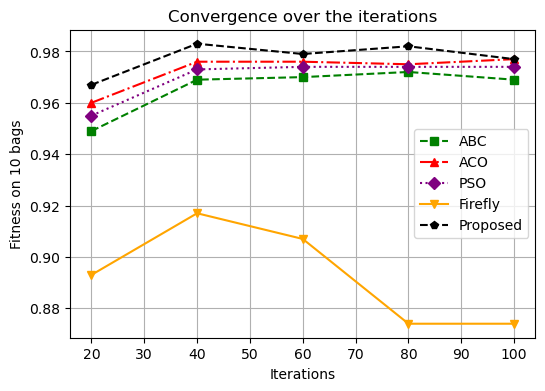

In [1]:
import matplotlib.pyplot as plt

# Data
iterations = [20, 40, 60, 80, 100]


abc_values = [0.949, 0.969, 0.970, 0.972, 0.969]
aco_values = [0.960, 0.976, 0.976, 0.975, 0.977]
pso_values = [0.955, 0.973, 0.974, 0.974, 0.974]
firefly_values = [0.893, 0.917, 0.907, 0.874, 0.874]
proposed_values = [0.967, 0.983, 0.979, 0.982, 0.977]

# Plotting with different line types and visual effects
plt.figure(figsize=(6, 4))


plt.plot(iterations, abc_values, marker='s', linestyle='--', color='g', label='ABC')
plt.plot(iterations, aco_values, marker='^', linestyle='-.', color='r', label='ACO')
plt.plot(iterations, pso_values, marker='D', linestyle=':', color='purple', label='PSO')
plt.plot(iterations, firefly_values, marker='v', linestyle='-', color='orange', label='Firefly')
plt.plot(iterations, proposed_values, marker='p', linestyle='--', color='black', label='Proposed')

# Adding labels and title
plt.xlabel('Iterations')
plt.ylabel('Fitness on 10 bags')
plt.title('Convergence over the iterations')
plt.legend()
plt.grid(True)
plt.show()


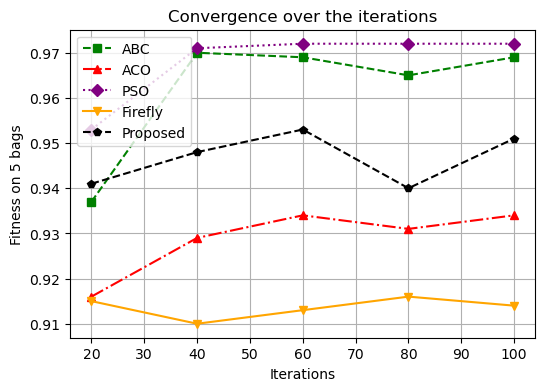

In [45]:
import matplotlib.pyplot as plt

# Data
iterations = [20, 40, 60, 80, 100]

abc_values = [0.937, 0.970, 0.969, 0.965, 0.969]
aco_values = [0.916, 0.929, 0.934, 0.931, 0.934]
pso_values = [0.953, 0.971, 0.972, 0.972, 0.972]
firefly_values = [0.915, 0.910, 0.913, 0.916, 0.914]
proposed_values = [0.941, 0.948, 0.953, 0.940, 0.951]

# Plotting with different line types and visual effects
plt.figure(figsize=(6, 4))

plt.plot(iterations, abc_values, marker='s', linestyle='--', color='g', label='ABC')
plt.plot(iterations, aco_values, marker='^', linestyle='-.', color='r', label='ACO')
plt.plot(iterations, pso_values, marker='D', linestyle=':', color='purple', label='PSO')
plt.plot(iterations, firefly_values, marker='v', linestyle='-', color='orange', label='Firefly')
plt.plot(iterations, proposed_values, marker='p', linestyle='--', color='black', label='Proposed')

# Adding labels and title
plt.xlabel('Iterations')
plt.ylabel('Fitness on 5 bags')
plt.title('Convergence over the iterations')
plt.legend()
plt.grid(True)
plt.show()


# ABC with 10 bags

Iteration 20:
Worst Bee Accuracy: 0.9592592592592593
Worst Bee Diversity (Hamming Distance): 0.2222222222222222
Worst Bee Fitness: 0.9493989158663897

Iteration 40:
Worst Bee Accuracy: 0.9592592592592593
Worst Bee Diversity (Hamming Distance): 0.14444444444444443
Worst Bee Fitness: 0.9678141727278287

Iteration 60:
Worst Bee Accuracy: 0.9814814814814815
Worst Bee Diversity (Hamming Distance): 0.08888888888888889
Worst Bee Fitness: 0.9707345880275108

Iteration 80:
Worst Bee Accuracy: 0.9851851851851852
Worst Bee Diversity (Hamming Distance): 0.18888888888888888
Worst Bee Fitness: 0.9725924838647719

Iteration 100:
Worst Bee Accuracy: 0.9925925925925926
Worst Bee Diversity (Hamming Distance): 0.09259259259259259
Worst Bee Fitness: 0.9696296276603816

Evaluation Metrics for Ensemble Predictions:
Accuracy: 0.9444444444444444
AUC: 0.9285714285714286
Sensitivity (Recall): 0.8571428571428571
Specificity: 1.0
Precision: 1.0
F1 Score: 0.923076923076923
G-measure: 0.9258200997725514


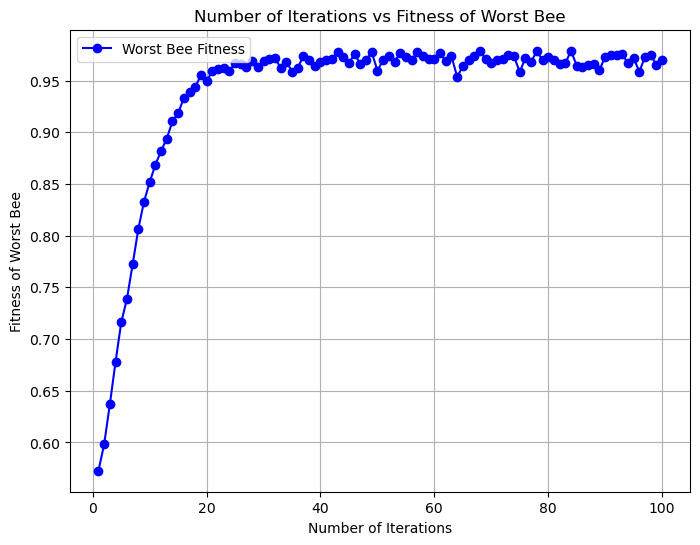

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of bees in the colony
num_bees = 10

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    },
    'LR': {  # Logistic Regression
        'model': LogisticRegression(),
        'param_grid': {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
    }
}

# Define the Artificial Bee Colony (ABC) algorithm
def abc_optimization(data, classifiers, num_bees):
    # Initialize the position of the bees randomly
    bees_positions = np.random.rand(num_bees, len(data))

    # Tracking lists for worst bee metrics and fitness
    worst_bee_accuracies = []
    worst_bee_diversities = []
    worst_bee_fitnesses = []

    # Initialize weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Perform ABC optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Employed bees phase
        for bee_position in bees_positions:
            # Convert the position to indices for selecting data
            bee_indices = np.round(bee_position * (len(data) - 1)).astype(int)  # Adjusted for zero-based indexing

            # Ensure that the selected indices cover at least two classes
            while len(np.unique(data[bee_indices, -1])) < 2:
                bee_indices = np.round(np.random.rand(len(data)) * (len(data) - 1)).astype(int)

            X_train_bee, y_train_bee = data[bee_indices, :-1], data[bee_indices, -1]

            ensemble_preds = np.empty((len(X_train_bee), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bee, y_train_bee)
                preds = model.predict(X_train_bee)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bee, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Onlooker bees phase (recruit bees based on information from employed bees)
        # Using a simple roulette wheel selection for simplicity
        probabilities = np.array(accuracies) / np.sum(accuracies)
        onlooker_indices = np.random.choice(num_bees, num_bees, p=probabilities)

        # Scout bees phase (generate new solutions randomly)
        scout_indices = np.where(np.isnan(probabilities))[0]

        # Merge employed bees, onlooker bees, and scout bees
        selected_indices = np.concatenate([onlooker_indices, scout_indices])

        # Rest of the ABC optimization code...
        # Calculate fitness for each bee
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the bee with the worst performance
        worst_bee_index = np.argmin(fitness)
        worst_bee_accuracy = accuracies[worst_bee_index]
        worst_bee_diversity = diversities[worst_bee_index]

        # Append worst bee metrics and fitness to tracking lists
        worst_bee_accuracies.append(worst_bee_accuracy)
        worst_bee_diversities.append(worst_bee_diversity)
        worst_bee_fitnesses.append(fitness)

        # Update weights for accuracy and diversity based on worst bee's performance
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Update bee positions using the ABC equations
        phi = np.random.uniform(low=-1, high=1, size=(num_bees, len(data)))
        distances = np.random.uniform(low=-1, high=1, size=(num_bees, 1))
        bees_positions = bees_positions + phi * distances

        # Clip the positions to be within the bounds [0, 1]
        bees_positions = np.clip(bees_positions, 0, 1)

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Bee Accuracy: {worst_bee_accuracy}")
            print(f"Worst Bee Diversity (Hamming Distance): {worst_bee_diversity}")
            print(f"Worst Bee Fitness: {fitness}")
            print()

    # Return the optimized positions and tracking lists
    return bees_positions, worst_bee_accuracies, worst_bee_diversities, worst_bee_fitnesses

# Perform ABC optimization to get the optimal positions and tracking lists
optimal_positions, worst_bee_accuracies, worst_bee_diversities, worst_bee_fitnesses = abc_optimization(data, classifiers, num_bees)

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal position
    classifier = clf['model']
    optimal_position = optimal_positions[idx]

    # Convert the position to indices for selecting data
    optimal_indices = (np.round(optimal_position * (len(data) - 1))).astype(int)  # Adjusted for zero-based indexing

    # Train the classifier on the optimal data (training data)
    classifier.fit(X[optimal_indices], y[optimal_indices])

    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)

    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for the negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of worst bee
num_iterations = 100  # Adjust the number of iterations as needed
plt.figure(figsize=(8, 6))
iterations_range = range(1, num_iterations + 1)
worst_bee_fitnesses_padded = worst_bee_fitnesses[:num_iterations] + [worst_bee_fitnesses[-1]] * (num_iterations - len(worst_bee_fitnesses))
plt.plot(iterations_range, worst_bee_fitnesses_padded, marker='o', color='b', label='Worst Bee Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Bee')
plt.title('Number of Iterations vs Fitness of Worst Bee')
plt.legend()
plt.grid(True)
plt.show()


# ABC with 5 bags

Iteration 20:
Worst Bee Accuracy: 0.9444444444444444
Worst Bee Diversity (Hamming Distance): 0.1814814814814815
Worst Bee Fitness: 0.9370464364943442

Iteration 40:
Worst Bee Accuracy: 0.9555555555555556
Worst Bee Diversity (Hamming Distance): 0.12222222222222222
Worst Bee Fitness: 0.9707721112818136

Iteration 60:
Worst Bee Accuracy: 0.9592592592592593
Worst Bee Diversity (Hamming Distance): 0.15185185185185185
Worst Bee Fitness: 0.9696234528719275

Iteration 80:
Worst Bee Accuracy: 0.9888888888888889
Worst Bee Diversity (Hamming Distance): 0.1259259259259259
Worst Bee Fitness: 0.9659258237642613

Iteration 100:
Worst Bee Accuracy: 0.9740740740740741
Worst Bee Diversity (Hamming Distance): 0.14814814814814814
Worst Bee Fitness: 0.9696296276123938

Evaluation Metrics for Ensemble Predictions:
Accuracy: 0.9074074074074074
AUC: 0.8809523809523809
Sensitivity (Recall): 0.7619047619047619
Specificity: 1.0
Precision: 1.0
F1 Score: 0.8648648648648648
G-measure: 0.8728715609439694


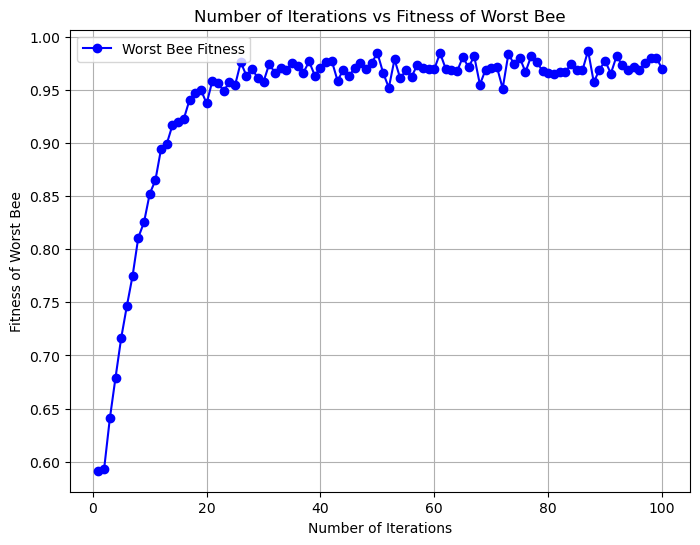

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of bees in the colony
num_bees = 5

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    },
    'LR': {  # Logistic Regression
        'model': LogisticRegression(),
        'param_grid': {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
    }
}

# Define the Artificial Bee Colony (ABC) algorithm
def abc_optimization(data, classifiers, num_bees):
    # Initialize the position of the bees randomly
    bees_positions = np.random.rand(num_bees, len(data))

    # Tracking lists for worst bee metrics and fitness
    worst_bee_accuracies = []
    worst_bee_diversities = []
    worst_bee_fitnesses = []

    # Initialize weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Perform ABC optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Employed bees phase
        for bee_position in bees_positions:
            # Convert the position to indices for selecting data
            bee_indices = np.round(bee_position * (len(data) - 1)).astype(int)  # Adjusted for zero-based indexing

            # Ensure that the selected indices cover at least two classes
            while len(np.unique(data[bee_indices, -1])) < 2:
                bee_indices = np.round(np.random.rand(len(data)) * (len(data) - 1)).astype(int)

            X_train_bee, y_train_bee = data[bee_indices, :-1], data[bee_indices, -1]

            ensemble_preds = np.empty((len(X_train_bee), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bee, y_train_bee)
                preds = model.predict(X_train_bee)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bee, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Onlooker bees phase (recruit bees based on information from employed bees)
        # Using a simple roulette wheel selection for simplicity
        probabilities = np.array(accuracies) / np.sum(accuracies)
        onlooker_indices = np.random.choice(num_bees, num_bees, p=probabilities)

        # Scout bees phase (generate new solutions randomly)
        scout_indices = np.where(np.isnan(probabilities))[0]

        # Merge employed bees, onlooker bees, and scout bees
        selected_indices = np.concatenate([onlooker_indices, scout_indices])

        # Rest of the ABC optimization code...
        # Calculate fitness for each bee
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the bee with the worst performance
        worst_bee_index = np.argmin(fitness)
        worst_bee_accuracy = accuracies[worst_bee_index]
        worst_bee_diversity = diversities[worst_bee_index]

        # Append worst bee metrics and fitness to tracking lists
        worst_bee_accuracies.append(worst_bee_accuracy)
        worst_bee_diversities.append(worst_bee_diversity)
        worst_bee_fitnesses.append(fitness)

        # Update weights for accuracy and diversity based on worst bee's performance
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Update bee positions using the ABC equations
        phi = np.random.uniform(low=-1, high=1, size=(num_bees, len(data)))
        distances = np.random.uniform(low=-1, high=1, size=(num_bees, 1))
        bees_positions = bees_positions + phi * distances

        # Clip the positions to be within the bounds [0, 1]
        bees_positions = np.clip(bees_positions, 0, 1)

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Bee Accuracy: {worst_bee_accuracy}")
            print(f"Worst Bee Diversity (Hamming Distance): {worst_bee_diversity}")
            print(f"Worst Bee Fitness: {fitness}")
            print()

    # Return the optimized positions and tracking lists
    return bees_positions, worst_bee_accuracies, worst_bee_diversities, worst_bee_fitnesses

# Perform ABC optimization to get the optimal positions and tracking lists
optimal_positions, worst_bee_accuracies, worst_bee_diversities, worst_bee_fitnesses = abc_optimization(data, classifiers, num_bees)

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal position
    classifier = clf['model']
    optimal_position = optimal_positions[idx]

    # Convert the position to indices for selecting data
    optimal_indices = (np.round(optimal_position * (len(data) - 1))).astype(int)  # Adjusted for zero-based indexing

    # Train the classifier on the optimal data (training data)
    classifier.fit(X[optimal_indices], y[optimal_indices])

    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)

    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for the negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of worst bee
num_iterations = 100  # Adjust the number of iterations as needed
plt.figure(figsize=(8, 6))
iterations_range = range(1, num_iterations + 1)
worst_bee_fitnesses_padded = worst_bee_fitnesses[:num_iterations] + [worst_bee_fitnesses[-1]] * (num_iterations - len(worst_bee_fitnesses))
plt.plot(iterations_range, worst_bee_fitnesses_padded, marker='o', color='b', label='Worst Bee Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Bee')
plt.title('Number of Iterations vs Fitness of Worst Bee')
plt.legend()
plt.grid(True)
plt.show()


# Ant colony optimization with 5 bags 

Iteration 20:
Worst Ant Accuracy: 0.9740740740740741
Worst Ant Diversity (Hamming Distance): 0.1037037037037037
Worst Ant Fitness: 0.9164889992679137

Iteration 40:
Worst Ant Accuracy: 0.9592592592592593
Worst Ant Diversity (Hamming Distance): 0.10740740740740741
Worst Ant Fitness: 0.9293337806068511

Iteration 60:
Worst Ant Accuracy: 0.9851851851851852
Worst Ant Diversity (Hamming Distance): 0.0962962962962963
Worst Ant Fitness: 0.9348094128234333

Iteration 80:
Worst Ant Accuracy: 0.9666666666666667
Worst Ant Diversity (Hamming Distance): 0.0962962962962963
Worst Ant Fitness: 0.9311110139706249

Iteration 100:
Worst Ant Accuracy: 0.9851851851851852
Worst Ant Diversity (Hamming Distance): 0.08148148148148149
Worst Ant Fitness: 0.9348148130436258

Evaluation Metrics for Ensemble Predictions:
Accuracy: 0.9074074074074074
AUC: 0.8896103896103897
Sensitivity (Recall): 0.8095238095238095
Specificity: 0.9696969696969697
Precision: 0.9444444444444444
F1 Score: 0.8717948717948718
G-measure: 0

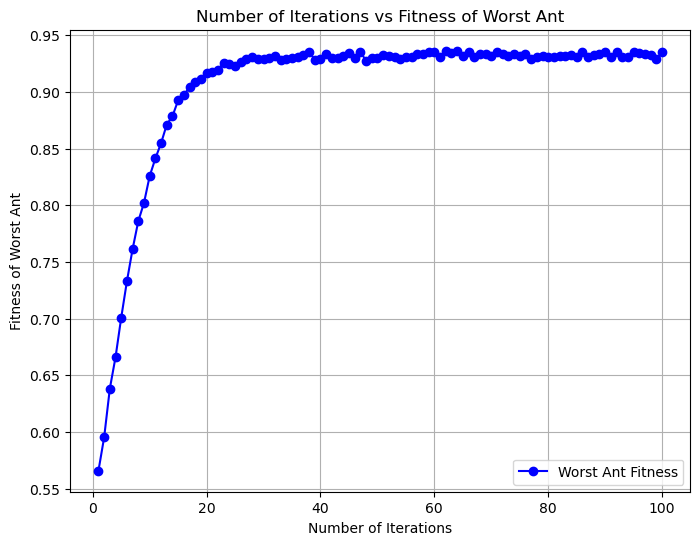

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of ants in the colony
num_ants = 5

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3]}
    },
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1], 'kernel': ['linear']}
    },
    'LR': {  # Logistic Regression
        'model': LogisticRegression(),
        'param_grid': {'C': [0.1], 'penalty': ['l1', 'l2']}
    }
}

# Define the Ant Colony Optimization (ACO) algorithm
def aco_optimization(data, classifiers, num_ants):
    # Initialize the position of the ants randomly
    ants_positions = np.random.rand(num_ants, len(data))

    # Tracking lists for worst ant metrics and fitness
    worst_ant_accuracies = []
    worst_ant_diversities = []
    worst_ant_fitnesses = []

    # Initialize weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Perform ACO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Ants construct solutions (positions) based on pheromone information
        for ant_position in ants_positions:
            # Convert the position to indices for selecting data
            ant_indices = np.round(ant_position * (len(data) - 1)).astype(int)  # Adjusted for zero-based indexing

            # Ensure that the selected indices cover at least two classes
            while len(np.unique(data[ant_indices, -1])) < 2:
                ant_indices = np.round(np.random.rand(len(data)) * (len(data) - 1)).astype(int)

            X_train_ant, y_train_ant = data[ant_indices, :-1], data[ant_indices, -1]

            ensemble_preds = np.empty((len(X_train_ant), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_ant, y_train_ant)
                preds = model.predict(X_train_ant)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_ant, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each ant
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the ant with the worst performance
        worst_ant_index = np.argmin(fitness)
        worst_ant_accuracy = accuracies[worst_ant_index]
        worst_ant_diversity = diversities[worst_ant_index]

        # Append worst ant metrics and fitness to tracking lists
        worst_ant_accuracies.append(worst_ant_accuracy)
        worst_ant_diversities.append(worst_ant_diversity)
        worst_ant_fitnesses.append(fitness)

        # Update weights for accuracy and diversity based on worst ant's performance
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Update ant positions using the ACO equations
        pheromone_update = 0.1  # Pheromone update parameter
        ants_positions[worst_ant_index] = (1 - pheromone_update) * ants_positions[worst_ant_index] + pheromone_update * np.random.rand(len(data))

        # Clip the positions to be within the bounds [0, 1]
        ants_positions = np.clip(ants_positions, 0, 1)

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Ant Accuracy: {worst_ant_accuracy}")
            print(f"Worst Ant Diversity (Hamming Distance): {worst_ant_diversity}")
            print(f"Worst Ant Fitness: {fitness}")
            print()

    # Return the optimized positions and tracking lists
    return ants_positions, worst_ant_accuracies, worst_ant_diversities, worst_ant_fitnesses

# Perform ACO optimization to get the optimal positions and tracking lists
optimal_positions, worst_ant_accuracies, worst_ant_diversities, worst_ant_fitnesses = aco_optimization(data, classifiers, num_ants)

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal position
    classifier = clf['model']
    optimal_position = optimal_positions[idx]

    # Convert the position to indices for selecting data
    optimal_indices = (np.round(optimal_position * (len(data) - 1))).astype(int)  # Adjusted for zero-based indexing

    # Train the classifier on the optimal data (training data)
    classifier.fit(X[optimal_indices], y[optimal_indices])

    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)

    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for the negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of worst ant
num_iterations = 100  # Adjust the number of iterations as needed
plt.figure(figsize=(8, 6))
iterations_range = range(1, num_iterations + 1)
worst_ant_fitnesses_padded = worst_ant_fitnesses[:num_iterations] + [worst_ant_fitnesses[-1]] * (num_iterations - len(worst_ant_fitnesses))
plt.plot(iterations_range, worst_ant_fitnesses_padded, marker='o', color='b', label='Worst Ant Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Ant')
plt.title('Number of Iterations vs Fitness of Worst Ant')
plt.legend()
plt.grid(True)
plt.show()


# Ant colony optimization with 10 bags

Iteration 20:
Worst Ant Accuracy: 0.9962962962962963
Worst Ant Diversity (Hamming Distance): 0.08888888888888889
Worst Ant Fitness: 0.9600072026917753

Iteration 40:
Worst Ant Accuracy: 0.9888888888888889
Worst Ant Diversity (Hamming Distance): 0.05925925925925926
Worst Ant Fitness: 0.9763445133851197

Iteration 60:
Worst Ant Accuracy: 0.9925925925925926
Worst Ant Diversity (Hamming Distance): 0.08518518518518518
Worst Ant Fitness: 0.9762904828772825

Iteration 80:
Worst Ant Accuracy: 0.9962962962962963
Worst Ant Diversity (Hamming Distance): 0.06666666666666667
Worst Ant Fitness: 0.975555450641899

Iteration 100:
Worst Ant Accuracy: 0.9962962962962963
Worst Ant Diversity (Hamming Distance): 0.09259259259259259
Worst Ant Fitness: 0.97740740551145

Evaluation Metrics for Ensemble Predictions:
Accuracy: 0.9259259259259259
AUC: 0.9220779220779222
Sensitivity (Recall): 0.9047619047619048
Specificity: 0.9393939393939394
Precision: 0.9047619047619048
F1 Score: 0.9047619047619048
G-measure: 0

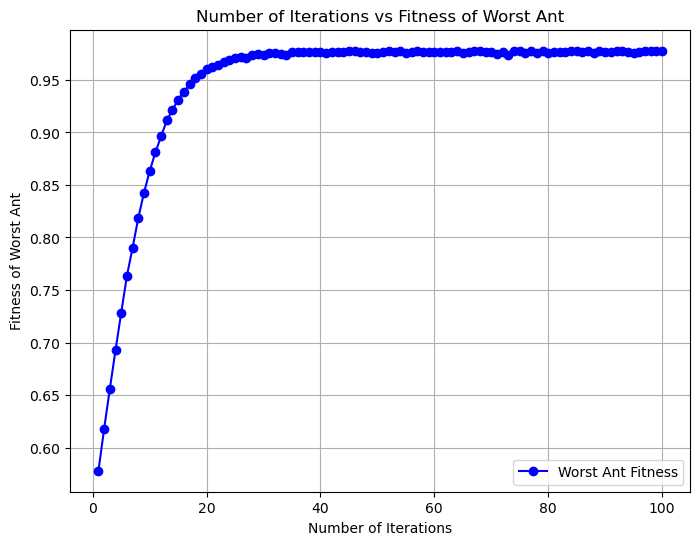

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of ants in the colony
num_ants = 10

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3]}
    },
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5]}
    },
   
    'LR': {  # Logistic Regression
        'model': LogisticRegression(),
        'param_grid': {'C': [0.1], 'penalty': ['l2']}
    }
}

# Define the Ant Colony Optimization (ACO) algorithm
def aco_optimization(data, classifiers, num_ants):
    # Initialize the position of the ants randomly
    ants_positions = np.random.rand(num_ants, len(data))

    # Tracking lists for worst ant metrics and fitness
    worst_ant_accuracies = []
    worst_ant_diversities = []
    worst_ant_fitnesses = []

    # Initialize weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Perform ACO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Ants construct solutions (positions) based on pheromone information
        for ant_position in ants_positions:
            # Convert the position to indices for selecting data
            ant_indices = np.round(ant_position * (len(data) - 1)).astype(int)  # Adjusted for zero-based indexing

            # Ensure that the selected indices cover at least two classes
            while len(np.unique(data[ant_indices, -1])) < 2:
                ant_indices = np.round(np.random.rand(len(data)) * (len(data) - 1)).astype(int)

            X_train_ant, y_train_ant = data[ant_indices, :-1], data[ant_indices, -1]

            ensemble_preds = np.empty((len(X_train_ant), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_ant, y_train_ant)
                preds = model.predict(X_train_ant)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_ant, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each ant
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the ant with the worst performance
        worst_ant_index = np.argmin(fitness)
        worst_ant_accuracy = accuracies[worst_ant_index]
        worst_ant_diversity = diversities[worst_ant_index]

        # Append worst ant metrics and fitness to tracking lists
        worst_ant_accuracies.append(worst_ant_accuracy)
        worst_ant_diversities.append(worst_ant_diversity)
        worst_ant_fitnesses.append(fitness)

        # Update weights for accuracy and diversity based on worst ant's performance
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Update ant positions using the ACO equations
        pheromone_update = 0.1  # Pheromone update parameter
        ants_positions[worst_ant_index] = (1 - pheromone_update) * ants_positions[worst_ant_index] + pheromone_update * np.random.rand(len(data))

        # Clip the positions to be within the bounds [0, 1]
        ants_positions = np.clip(ants_positions, 0, 1)

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Ant Accuracy: {worst_ant_accuracy}")
            print(f"Worst Ant Diversity (Hamming Distance): {worst_ant_diversity}")
            print(f"Worst Ant Fitness: {fitness}")
            print()

    # Return the optimized positions and tracking lists
    return ants_positions, worst_ant_accuracies, worst_ant_diversities, worst_ant_fitnesses

# Perform ACO optimization to get the optimal positions and tracking lists
optimal_positions, worst_ant_accuracies, worst_ant_diversities, worst_ant_fitnesses = aco_optimization(data, classifiers, num_ants)

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal position
    classifier = clf['model']
    optimal_position = optimal_positions[idx]

    # Convert the position to indices for selecting data
    optimal_indices = (np.round(optimal_position * (len(data) - 1))).astype(int)  # Adjusted for zero-based indexing

    # Train the classifier on the optimal data (training data)
    classifier.fit(X[optimal_indices], y[optimal_indices])

    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)

    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for the negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of worst ant
num_iterations = 100  # Adjust the number of iterations as needed
plt.figure(figsize=(8, 6))
iterations_range = range(1, num_iterations + 1)
worst_ant_fitnesses_padded = worst_ant_fitnesses[:num_iterations] + [worst_ant_fitnesses[-1]] * (num_iterations - len(worst_ant_fitnesses))
plt.plot(iterations_range, worst_ant_fitnesses_padded, marker='o', color='b', label='Worst Ant Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Ant')
plt.title('Number of Iterations vs Fitness of Worst Ant')
plt.legend()
plt.grid(True)
plt.show()


# Firefly with 5 bags 

Iteration 20:
Worst Firefly Accuracy: 0.9259259259259259
Worst Firefly Diversity: 0.2111111111111111
Worst Firefly Fitness: 0.9151515857187605

Iteration 40:
Worst Firefly Accuracy: 0.8814814814814815
Worst Firefly Diversity: 0.26666666666666666
Worst Firefly Fitness: 0.9108318130826141

Iteration 60:
Worst Firefly Accuracy: 0.8814814814814815
Worst Firefly Diversity: 0.26666666666666666
Worst Firefly Fitness: 0.9133283267399364

Iteration 80:
Worst Firefly Accuracy: 0.8814814814814815
Worst Firefly Diversity: 0.26666666666666666
Worst Firefly Fitness: 0.9162962018595213

Iteration 100:
Worst Firefly Accuracy: 0.8814814814814815
Worst Firefly Diversity: 0.26666666666666666
Worst Firefly Fitness: 0.9140740724163111

Evaluation Metrics for Ensemble Predictions:
Accuracy: 0.9444444444444444
AUC: 0.9372294372294372
Sensitivity (Recall): 0.9047619047619048
Specificity: 0.9696969696969697
Precision: 0.95
F1 Score: 0.9268292682926829
G-measure: 0.9366668977522785


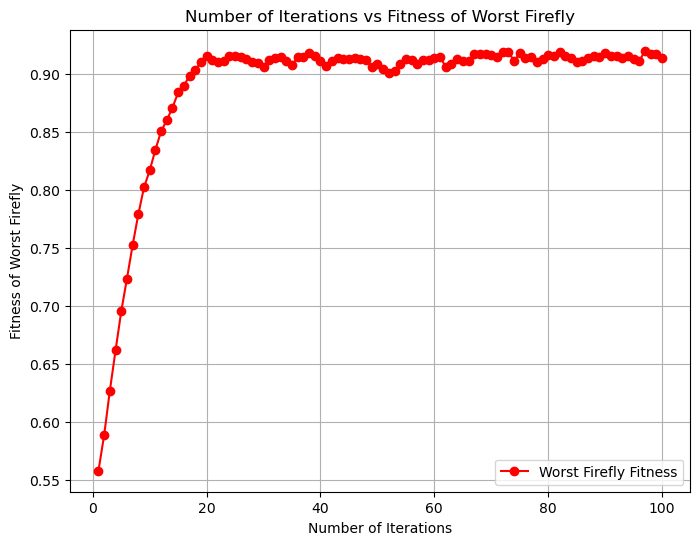

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of fireflies in the population
num_fireflies = 5

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3]}
    },
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1], 'kernel': ['linear']}
    },
    'LR': {  # Logistic Regression
        'model': LogisticRegression(),
        'param_grid': {'C': [0.1], 'penalty': ['l1', 'l2']}
    }
}

# Define the Firefly Optimization (FA) algorithm
def firefly_optimization(data, classifiers, num_fireflies):
    # Initialize the position of the fireflies randomly
    fireflies_positions = np.random.rand(num_fireflies, len(data))

    # Tracking lists for worst firefly metrics and fitness
    worst_firefly_accuracies = []
    worst_firefly_diversities = []
    worst_firefly_fitnesses = []

    # Initialize weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Perform FA optimization
    num_iterations = 100
    beta_0 = 1.0  # Initial attractiveness
    alpha = 0.2    # Light absorption coefficient

    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Move fireflies towards better solutions
        for i in range(num_fireflies):
            for j in range(num_fireflies):
                if i != j:  # Exclude self-comparison
                    # Evaluate fitness of fireflies i and j
                    fitness_i = evaluate_fitness(fireflies_positions[i], data, classifiers)
                    fitness_j = evaluate_fitness(fireflies_positions[j], data, classifiers)

                    # Update position of firefly i based on attractiveness and distance
                    if fitness_i > fitness_j:
                        distance = np.linalg.norm(fireflies_positions[i] - fireflies_positions[j])
                        attractiveness = beta_0 * np.exp(-alpha * distance**2)
                        fireflies_positions[i] += attractiveness * (fireflies_positions[j] - fireflies_positions[i])

            # Ensure positions are within the bounds [0, 1]
            fireflies_positions[i] = np.clip(fireflies_positions[i], 0, 1)

            # Evaluate fitness of the updated firefly
            fitness = evaluate_fitness(fireflies_positions[i], data, classifiers)
            accuracies.append(fitness[0])
            diversities.append(fitness[1])

        # Rest of the FA optimization code...

        # Calculate fitness for each firefly
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the firefly with the worst performance
        worst_firefly_index = np.argmin(fitness)
        worst_firefly_accuracy = accuracies[worst_firefly_index]
        worst_firefly_diversity = diversities[worst_firefly_index]

        # Append worst firefly metrics and fitness to tracking lists
        worst_firefly_accuracies.append(worst_firefly_accuracy)
        worst_firefly_diversities.append(worst_firefly_diversity)
        worst_firefly_fitnesses.append(fitness)

        # Update weights for accuracy and diversity based on worst firefly's performance
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Firefly Accuracy: {worst_firefly_accuracy}")
            print(f"Worst Firefly Diversity: {worst_firefly_diversity}")
            print(f"Worst Firefly Fitness: {fitness}")
            print()

    # Return the optimized positions and tracking lists
    return fireflies_positions, worst_firefly_accuracies, worst_firefly_diversities, worst_firefly_fitnesses

# Evaluate the fitness of a firefly
def evaluate_fitness(position, data, classifiers):
    # Convert the position to indices for selecting data
    indices = np.round(position * (len(data) - 1)).astype(int)

    # Ensure that the selected indices cover at least two classes
    while len(np.unique(data[indices, -1])) < 2:
        indices = np.round(np.random.rand(len(data)) * (len(data) - 1)).astype(int)

    X_train, y_train = data[indices, :-1], data[indices, -1]

    ensemble_preds = np.empty((len(X_train), len(classifiers)))

    # Train and predict with each classifier using 5-fold cross-validation
    for idx, (name, clf) in enumerate(classifiers.items()):
        model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
        model.fit(X_train, y_train)
        preds = model.predict(X_train)
        ensemble_preds[:, idx] = preds

    # Calculate diversity as Hamming distance between classifiers' predictions
    diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

    # Calculate accuracy
    ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
    accuracy = accuracy_score(y_train, ensemble_preds_majority)

    return accuracy, diversity

# Perform FA optimization to get the optimal positions and tracking lists
optimal_positions, worst_firefly_accuracies, worst_firefly_diversities, worst_firefly_fitnesses = firefly_optimization(data, classifiers, num_fireflies)

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal position
    classifier = clf['model']
    optimal_position = optimal_positions[idx]

    # Convert the position to indices for selecting data
    optimal_indices = (np.round(optimal_position * (len(data) - 1))).astype(int)

    # Train the classifier on the optimal data (training data)
    classifier.fit(X[optimal_indices], y[optimal_indices])

    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)

    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for the negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of worst firefly
num_iterations = 100  # Adjust the number of iterations as needed
plt.figure(figsize=(8, 6))
iterations_range = range(1, num_iterations + 1)
worst_firefly_fitnesses_padded = worst_firefly_fitnesses[:num_iterations] + [worst_firefly_fitnesses[-1]] * (num_iterations - len(worst_firefly_fitnesses))
plt.plot(iterations_range, worst_firefly_fitnesses_padded, marker='o', color='r', label='Worst Firefly Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Firefly')
plt.title('Number of Iterations vs Fitness of Worst Firefly')
plt.legend()
plt.grid(True)
plt.show()


# Firefly with 10 bags

Iteration 20:
Worst Firefly Accuracy: 0.9259259259259259
Worst Firefly Diversity: 0.2
Worst Firefly Fitness: 0.8931170605419122

Iteration 40:
Worst Firefly Accuracy: 0.9518518518518518
Worst Firefly Diversity: 0.1925925925925926
Worst Firefly Fitness: 0.917491534242752

Iteration 60:
Worst Firefly Accuracy: 0.9
Worst Firefly Diversity: 0.22592592592592592
Worst Firefly Fitness: 0.9077728646906611

Iteration 80:
Worst Firefly Accuracy: 0.8666666666666667
Worst Firefly Diversity: 0.24814814814814815
Worst Firefly Fitness: 0.8740739914660364

Iteration 100:
Worst Firefly Accuracy: 0.8666666666666667
Worst Firefly Diversity: 0.24814814814814815
Worst Firefly Fitness: 0.8740740725838326

Evaluation Metrics for Ensemble Predictions:
Accuracy: 0.9629629629629629
AUC: 0.9696969696969697
Sensitivity (Recall): 1.0
Specificity: 0.9393939393939394
Precision: 0.9130434782608695
F1 Score: 0.9545454545454545
G-measure: 0.9692233691951198


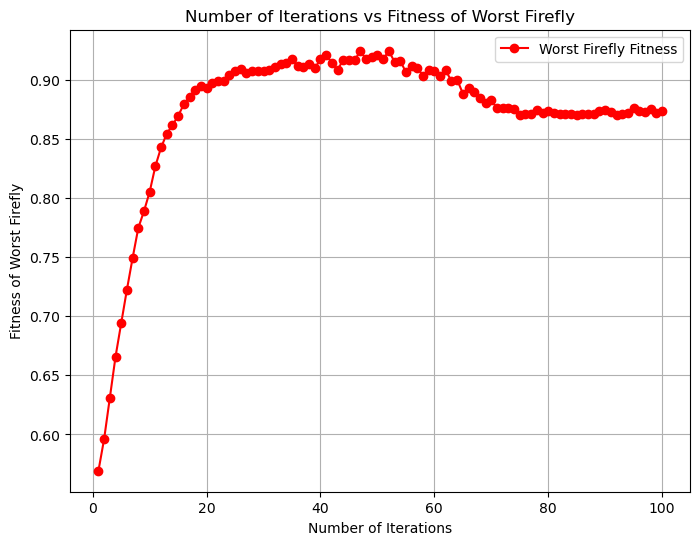

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of fireflies in the population
num_fireflies = 10

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3]}
    },
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1], 'kernel': ['linear']}
    },
    'LR': {  # Logistic Regression
        'model': LogisticRegression(),
        'param_grid': {'C': [0.1], 'penalty': ['l1', 'l2']}
    }
}

# Define the Firefly Optimization (FA) algorithm
def firefly_optimization(data, classifiers, num_fireflies):
    # Initialize the position of the fireflies randomly
    fireflies_positions = np.random.rand(num_fireflies, len(data))

    # Tracking lists for worst firefly metrics and fitness
    worst_firefly_accuracies = []
    worst_firefly_diversities = []
    worst_firefly_fitnesses = []

    # Initialize weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Perform FA optimization
    num_iterations = 100
    beta_0 = 1.0  # Initial attractiveness
    alpha = 0.2    # Light absorption coefficient

    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Move fireflies towards better solutions
        for i in range(num_fireflies):
            for j in range(num_fireflies):
                if i != j:  # Exclude self-comparison
                    # Evaluate fitness of fireflies i and j
                    fitness_i = evaluate_fitness(fireflies_positions[i], data, classifiers)
                    fitness_j = evaluate_fitness(fireflies_positions[j], data, classifiers)

                    # Update position of firefly i based on attractiveness and distance
                    if fitness_i > fitness_j:
                        distance = np.linalg.norm(fireflies_positions[i] - fireflies_positions[j])
                        attractiveness = beta_0 * np.exp(-alpha * distance**2)
                        fireflies_positions[i] += attractiveness * (fireflies_positions[j] - fireflies_positions[i])

            # Ensure positions are within the bounds [0, 1]
            fireflies_positions[i] = np.clip(fireflies_positions[i], 0, 1)

            # Evaluate fitness of the updated firefly
            fitness = evaluate_fitness(fireflies_positions[i], data, classifiers)
            accuracies.append(fitness[0])
            diversities.append(fitness[1])

        # Rest of the FA optimization code...

        # Calculate fitness for each firefly
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the firefly with the worst performance
        worst_firefly_index = np.argmin(fitness)
        worst_firefly_accuracy = accuracies[worst_firefly_index]
        worst_firefly_diversity = diversities[worst_firefly_index]

        # Append worst firefly metrics and fitness to tracking lists
        worst_firefly_accuracies.append(worst_firefly_accuracy)
        worst_firefly_diversities.append(worst_firefly_diversity)
        worst_firefly_fitnesses.append(fitness)

        # Update weights for accuracy and diversity based on worst firefly's performance
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Firefly Accuracy: {worst_firefly_accuracy}")
            print(f"Worst Firefly Diversity: {worst_firefly_diversity}")
            print(f"Worst Firefly Fitness: {fitness}")
            print()

    # Return the optimized positions and tracking lists
    return fireflies_positions, worst_firefly_accuracies, worst_firefly_diversities, worst_firefly_fitnesses

# Evaluate the fitness of a firefly
def evaluate_fitness(position, data, classifiers):
    # Convert the position to indices for selecting data
    indices = np.round(position * (len(data) - 1)).astype(int)

    # Ensure that the selected indices cover at least two classes
    while len(np.unique(data[indices, -1])) < 2:
        indices = np.round(np.random.rand(len(data)) * (len(data) - 1)).astype(int)

    X_train, y_train = data[indices, :-1], data[indices, -1]

    ensemble_preds = np.empty((len(X_train), len(classifiers)))

    # Train and predict with each classifier using 5-fold cross-validation
    for idx, (name, clf) in enumerate(classifiers.items()):
        model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
        model.fit(X_train, y_train)
        preds = model.predict(X_train)
        ensemble_preds[:, idx] = preds

    # Calculate diversity as Hamming distance between classifiers' predictions
    diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

    # Calculate accuracy
    ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
    accuracy = accuracy_score(y_train, ensemble_preds_majority)

    return accuracy, diversity

# Perform FA optimization to get the optimal positions and tracking lists
optimal_positions, worst_firefly_accuracies, worst_firefly_diversities, worst_firefly_fitnesses = firefly_optimization(data, classifiers, num_fireflies)

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal position
    classifier = clf['model']
    optimal_position = optimal_positions[idx]

    # Convert the position to indices for selecting data
    optimal_indices = (np.round(optimal_position * (len(data) - 1))).astype(int)

    # Train the classifier on the optimal data (training data)
    classifier.fit(X[optimal_indices], y[optimal_indices])

    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)

    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for the negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of worst firefly
num_iterations = 100  # Adjust the number of iterations as needed
plt.figure(figsize=(8, 6))
iterations_range = range(1, num_iterations + 1)
worst_firefly_fitnesses_padded = worst_firefly_fitnesses[:num_iterations] + [worst_firefly_fitnesses[-1]] * (num_iterations - len(worst_firefly_fitnesses))
plt.plot(iterations_range, worst_firefly_fitnesses_padded, marker='o', color='r', label='Worst Firefly Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Firefly')
plt.title('Number of Iterations vs Fitness of Worst Firefly')
plt.legend()
plt.grid(True)
plt.show()


# PSO 5 bags 

Iteration 20:
Best Particle Accuracy: 0.9703703703703703
Best Particle Diversity (Hamming Distance): 0.1111111111111111
Best Particle Fitness: 0.9536396557174239

Iteration 40:
Best Particle Accuracy: 0.9703703703703703
Best Particle Diversity (Hamming Distance): 0.1111111111111111
Best Particle Fitness: 0.9715033943115364

Iteration 60:
Best Particle Accuracy: 0.9703703703703703
Best Particle Diversity (Hamming Distance): 0.1111111111111111
Best Particle Fitness: 0.9725862875977064

Iteration 80:
Best Particle Accuracy: 0.9703703703703703
Best Particle Diversity (Hamming Distance): 0.1111111111111111
Best Particle Fitness: 0.9725924784573492

Iteration 100:
Best Particle Accuracy: 0.9703703703703703
Best Particle Diversity (Hamming Distance): 0.1111111111111111
Best Particle Fitness: 0.9725925905299865

Evaluation Metrics for Ensemble Predictions from PSO:
Accuracy: 0.8888888888888888
AUC: 0.8917748917748917
Sensitivity (Recall): 0.9047619047619048
Specificity: 0.8787878787878788
Prec

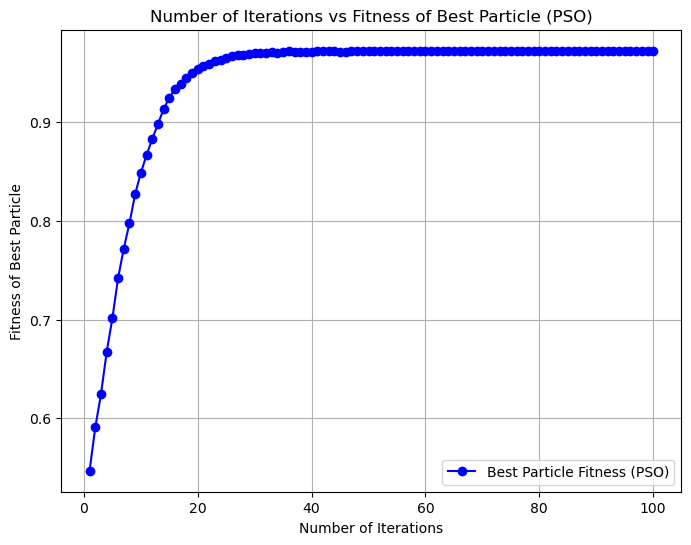

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of particles in the swarm
num_particles = 5

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3]}
    },
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1], 'kernel': ['linear']}
    },
    'LR': {  # Logistic Regression
        'model': LogisticRegression(),
        'param_grid': {'C': [0.1, 1], 'penalty': ['l1', 'l2']}
    }
}

# Define the Particle Swarm Optimization (PSO) algorithm
def pso_optimization(data, classifiers, num_particles):
    # Initialize particle positions and velocities
    particles_positions = np.random.rand(num_particles, len(data))
    particles_velocities = np.random.rand(num_particles, len(data))

    # Tracking lists for best particle metrics and fitness
    best_particle_accuracies = []
    best_particle_diversities = []
    best_particle_fitnesses = []

    # Initialize weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Set inertia weight and acceleration constants
    inertia_weight = 0.5
    acceleration_const1 = 2.0
    acceleration_const2 = 2.0

    # Perform PSO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Update particle positions and velocities
        particles_velocities = inertia_weight * particles_velocities + \
                               acceleration_const1 * np.random.rand() * (particles_positions - particles_positions) + \
                               acceleration_const2 * np.random.rand() * (particles_positions - particles_positions)

        particles_positions = particles_positions + particles_velocities

        # Clip the positions and velocities to be within the bounds [0, 1]
        particles_positions = np.clip(particles_positions, 0, 1)
        particles_velocities = np.clip(particles_velocities, -1, 1)

        # Particles construct solutions (positions) based on pheromone information
        for particle_position in particles_positions:
            # Convert the position to indices for selecting data
            particle_indices = np.round(particle_position * (len(data) - 1)).astype(int)  # Adjusted for zero-based indexing

            # Ensure that the selected indices cover at least two classes
            while len(np.unique(data[particle_indices, -1])) < 2:
                particle_indices = np.round(np.random.rand(len(data)) * (len(data) - 1)).astype(int)

            X_train_particle, y_train_particle = data[particle_indices, :-1], data[particle_indices, -1]

            ensemble_preds = np.empty((len(X_train_particle), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_particle, y_train_particle)
                preds = model.predict(X_train_particle)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_particle, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each particle
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the best particle
        best_particle_index = np.argmax(fitness)
        best_particle_accuracy = accuracies[best_particle_index]
        best_particle_diversity = diversities[best_particle_index]

        # Append best particle metrics and fitness to tracking lists
        best_particle_accuracies.append(best_particle_accuracy)
        best_particle_diversities.append(best_particle_diversity)
        best_particle_fitnesses.append(fitness)

        # Update weights for accuracy and diversity based on best particle's performance
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Best Particle Accuracy: {best_particle_accuracy}")
            print(f"Best Particle Diversity (Hamming Distance): {best_particle_diversity}")
            print(f"Best Particle Fitness: {fitness}")
            print()

    # Return the optimized positions and tracking lists
    return particles_positions, best_particle_accuracies, best_particle_diversities, best_particle_fitnesses

# Perform PSO optimization to get the optimal positions and tracking lists
optimal_positions_pso, best_particle_accuracies, best_particle_diversities, best_particle_fitnesses = pso_optimization(data, classifiers, num_particles)

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds_pso = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal position
    classifier = clf['model']
    optimal_position_pso = optimal_positions_pso[idx]

    # Convert the position to indices for selecting data
    optimal_indices_pso = (np.round(optimal_position_pso * (len(data) - 1))).astype(int)  # Adjusted for zero-based indexing

    # Train the classifier on the optimal data (training data)
    classifier.fit(X[optimal_indices_pso], y[optimal_indices_pso])

    # Make predictions on the testing data using the trained classifier
    probs_pso = classifier.predict_proba(X_test)

    # Store the probabilities of the positive class (1) in the ensemble_preds_pso array
    ensemble_preds_pso[:, idx] = probs_pso[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority_pso = np.mean(ensemble_preds_pso, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority_pso = (ensemble_preds_majority_pso >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions from PSO
accuracy_pso = accuracy_score(y_test, ensemble_preds_majority_pso)
auc_pso = roc_auc_score(y_test, ensemble_preds_majority_pso)
sensitivity_pso = recall_score(y_test, ensemble_preds_majority_pso)
specificity_pso = recall_score(y_test, ensemble_preds_majority_pso, pos_label=0)  # Calculate recall for the negative class (0)
precision_pso = precision_score(y_test, ensemble_preds_majority_pso)
f1_measure_pso = f1_score(y_test, ensemble_preds_majority_pso)

# Calculate G-measure for PSO
g_measure_pso = np.sqrt(sensitivity_pso * specificity_pso)

# Print evaluation metrics for the ensemble predictions from PSO
print("Evaluation Metrics for Ensemble Predictions from PSO:")
print("Accuracy:", accuracy_pso)
print("AUC:", auc_pso)
print("Sensitivity (Recall):", sensitivity_pso)
print("Specificity:", specificity_pso)
print("Precision:", precision_pso)
print("F1 Score:", f1_measure_pso)
print("G-measure:", g_measure_pso)

# Line plot for number of iterations vs fitness of best particle
num_iterations = 100  # Adjust the number of iterations as needed
plt.figure(figsize=(8, 6))
iterations_range = range(1, num_iterations + 1)
best_particle_fitnesses_padded = best_particle_fitnesses[:num_iterations] + [best_particle_fitnesses[-1]] * (num_iterations - len(best_particle_fitnesses))
plt.plot(iterations_range, best_particle_fitnesses_padded, marker='o', color='b', label='Best Particle Fitness (PSO)')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Best Particle')
plt.title('Number of Iterations vs Fitness of Best Particle (PSO)')
plt.legend()
plt.grid(True)
plt.show()


# PSO 10 BAGS 

Iteration 20:
Best Particle Accuracy: 0.9777777777777777
Best Particle Diversity (Hamming Distance): 0.1
Best Particle Fitness: 0.9556435792756219

Iteration 40:
Best Particle Accuracy: 0.9777777777777777
Best Particle Diversity (Hamming Distance): 0.1
Best Particle Fitness: 0.9737267987476359

Iteration 60:
Best Particle Accuracy: 0.9777777777777777
Best Particle Diversity (Hamming Distance): 0.1
Best Particle Fitness: 0.9748085365360085

Iteration 80:
Best Particle Accuracy: 0.9740740740740741
Best Particle Diversity (Hamming Distance): 0.1
Best Particle Fitness: 0.9744443310334093

Iteration 100:
Best Particle Accuracy: 0.9740740740740741
Best Particle Diversity (Hamming Distance): 0.1
Best Particle Fitness: 0.9740740720254281

Evaluation Metrics for Ensemble Predictions from PSO:
Accuracy: 0.9074074074074074
AUC: 0.9069264069264068
Sensitivity (Recall): 0.9047619047619048
Specificity: 0.9090909090909091
Precision: 0.8636363636363636
F1 Score: 0.8837209302325582
G-measure: 0.9069238

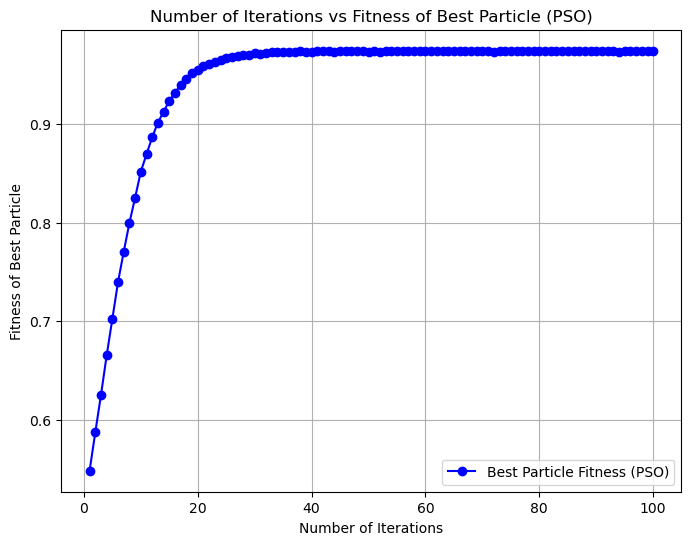

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of particles in the swarm
num_particles = 10

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3]}
    },
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1], 'kernel': ['linear']}
    },
    'LR': {  # Logistic Regression
        'model': LogisticRegression(),
        'param_grid': {'C': [0.1, 1], 'penalty': ['l1', 'l2']}
    }
}

# Define the Particle Swarm Optimization (PSO) algorithm
def pso_optimization(data, classifiers, num_particles):
    # Initialize particle positions and velocities
    particles_positions = np.random.rand(num_particles, len(data))
    particles_velocities = np.random.rand(num_particles, len(data))

    # Tracking lists for best particle metrics and fitness
    best_particle_accuracies = []
    best_particle_diversities = []
    best_particle_fitnesses = []

    # Initialize weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Set inertia weight and acceleration constants
    inertia_weight = 0.5
    acceleration_const1 = 2.0
    acceleration_const2 = 2.0

    # Perform PSO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Update particle positions and velocities
        particles_velocities = inertia_weight * particles_velocities + \
                               acceleration_const1 * np.random.rand() * (particles_positions - particles_positions) + \
                               acceleration_const2 * np.random.rand() * (particles_positions - particles_positions)

        particles_positions = particles_positions + particles_velocities

        # Clip the positions and velocities to be within the bounds [0, 1]
        particles_positions = np.clip(particles_positions, 0, 1)
        particles_velocities = np.clip(particles_velocities, -1, 1)

        # Particles construct solutions (positions) based on pheromone information
        for particle_position in particles_positions:
            # Convert the position to indices for selecting data
            particle_indices = np.round(particle_position * (len(data) - 1)).astype(int)  # Adjusted for zero-based indexing

            # Ensure that the selected indices cover at least two classes
            while len(np.unique(data[particle_indices, -1])) < 2:
                particle_indices = np.round(np.random.rand(len(data)) * (len(data) - 1)).astype(int)

            X_train_particle, y_train_particle = data[particle_indices, :-1], data[particle_indices, -1]

            ensemble_preds = np.empty((len(X_train_particle), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_particle, y_train_particle)
                preds = model.predict(X_train_particle)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_particle, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each particle
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the best particle
        best_particle_index = np.argmax(fitness)
        best_particle_accuracy = accuracies[best_particle_index]
        best_particle_diversity = diversities[best_particle_index]

        # Append best particle metrics and fitness to tracking lists
        best_particle_accuracies.append(best_particle_accuracy)
        best_particle_diversities.append(best_particle_diversity)
        best_particle_fitnesses.append(fitness)

        # Update weights for accuracy and diversity based on best particle's performance
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Best Particle Accuracy: {best_particle_accuracy}")
            print(f"Best Particle Diversity (Hamming Distance): {best_particle_diversity}")
            print(f"Best Particle Fitness: {fitness}")
            print()

    # Return the optimized positions and tracking lists
    return particles_positions, best_particle_accuracies, best_particle_diversities, best_particle_fitnesses

# Perform PSO optimization to get the optimal positions and tracking lists
optimal_positions_pso, best_particle_accuracies, best_particle_diversities, best_particle_fitnesses = pso_optimization(data, classifiers, num_particles)

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds_pso = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal position
    classifier = clf['model']
    optimal_position_pso = optimal_positions_pso[idx]

    # Convert the position to indices for selecting data
    optimal_indices_pso = (np.round(optimal_position_pso * (len(data) - 1))).astype(int)  # Adjusted for zero-based indexing

    # Train the classifier on the optimal data (training data)
    classifier.fit(X[optimal_indices_pso], y[optimal_indices_pso])

    # Make predictions on the testing data using the trained classifier
    probs_pso = classifier.predict_proba(X_test)

    # Store the probabilities of the positive class (1) in the ensemble_preds_pso array
    ensemble_preds_pso[:, idx] = probs_pso[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority_pso = np.mean(ensemble_preds_pso, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority_pso = (ensemble_preds_majority_pso >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions from PSO
accuracy_pso = accuracy_score(y_test, ensemble_preds_majority_pso)
auc_pso = roc_auc_score(y_test, ensemble_preds_majority_pso)
sensitivity_pso = recall_score(y_test, ensemble_preds_majority_pso)
specificity_pso = recall_score(y_test, ensemble_preds_majority_pso, pos_label=0)  # Calculate recall for the negative class (0)
precision_pso = precision_score(y_test, ensemble_preds_majority_pso)
f1_measure_pso = f1_score(y_test, ensemble_preds_majority_pso)

# Calculate G-measure for PSO
g_measure_pso = np.sqrt(sensitivity_pso * specificity_pso)

# Print evaluation metrics for the ensemble predictions from PSO
print("Evaluation Metrics for Ensemble Predictions from PSO:")
print("Accuracy:", accuracy_pso)
print("AUC:", auc_pso)
print("Sensitivity (Recall):", sensitivity_pso)
print("Specificity:", specificity_pso)
print("Precision:", precision_pso)
print("F1 Score:", f1_measure_pso)
print("G-measure:", g_measure_pso)

# Line plot for number of iterations vs fitness of best particle
num_iterations = 100  # Adjust the number of iterations as needed
plt.figure(figsize=(8, 6))
iterations_range = range(1, num_iterations + 1)
best_particle_fitnesses_padded = best_particle_fitnesses[:num_iterations] + [best_particle_fitnesses[-1]] * (num_iterations - len(best_particle_fitnesses))
plt.plot(iterations_range, best_particle_fitnesses_padded, marker='o', color='b', label='Best Particle Fitness (PSO)')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Best Particle')
plt.title('Number of Iterations vs Fitness of Best Particle (PSO)')
plt.legend()
plt.grid(True)
plt.show()


In [26]:
# worst bag hamming 5 bags dynamic weights also print

Iteration 20:
Worst Bag Accuracy: 0.9962825278810409
Worst Bag Diversity (Hamming Distance): 0.07063197026022305
Worst Bag Fitness: 0.9542166803726763
Accuracy Weight: 0.9822491904206394
Diversity Weight: 0.017750809579360517

Iteration 40:
Worst Bag Accuracy: 0.9949494949494949
Worst Bag Diversity (Hamming Distance): 0.06060606060606061
Worst Bag Fitness: 0.9720355964291804
Accuracy Weight: 0.9996735240747223
Diversity Weight: 0.0003264759252776931

Iteration 60:
Worst Bag Accuracy: 0.958139534883721
Worst Bag Diversity (Hamming Distance): 0.15813953488372093
Worst Bag Fitness: 0.9633825194061824
Accuracy Weight: 0.9999940981673082
Diversity Weight: 5.901832691674817e-06

Iteration 80:
Worst Bag Accuracy: 0.9659090909090909
Worst Bag Diversity (Hamming Distance): 0.14204545454545456
Worst Bag Fitness: 0.9641292915931501
Accuracy Weight: 0.9999998933438515
Diversity Weight: 1.0665614837916577e-07

Iteration 100:
Worst Bag Accuracy: 0.9625
Worst Bag Diversity (Hamming Distance): 0.12916

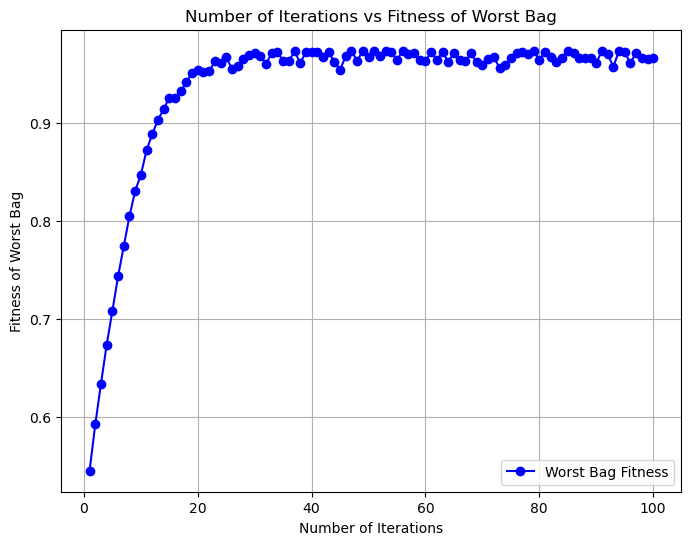

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of bags and the desired bag size range
num_bags = 5
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },    
    
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Define the Teaching-Learning-Based Optimization (TLBO) algorithm
def tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size):
    # Initialize the bags randomly
    bags = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size)) for _ in range(num_bags)]

    # Initialize the initial weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Tracking lists for worst bag metrics and fitness
    worst_bag_accuracies = []
    worst_bag_diversities = []
    worst_bag_fitnesses = []

    # Perform TLBO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each bag using 5-fold cross-validation
        for bag in bags:
            X_train_bag, y_train_bag = data[bag, :-1], data[bag, -1]

            ensemble_preds = np.empty((len(X_train_bag), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bag, y_train_bag)
                preds = model.predict(X_train_bag)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bag, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each bag using dynamic weights
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the bag with the worst performance
        worst_bag_index = np.argmin(fitness)
        worst_bag_accuracy = accuracies[worst_bag_index]
        worst_bag_diversity = diversities[worst_bag_index]

        # Append worst bag metrics and fitness to tracking lists
        worst_bag_accuracies.append(worst_bag_accuracy)
        worst_bag_diversities.append(worst_bag_diversity)
        worst_bag_fitnesses.append(fitness)

        # Update the dynamic weights for accuracy and diversity
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Replace the worst bag with a new bag randomly sampled from the dataset
        new_bag = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size))
        bags[worst_bag_index] = new_bag

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Bag Accuracy: {worst_bag_accuracy}")
            print(f"Worst Bag Diversity (Hamming Distance): {worst_bag_diversity}")
            print(f"Worst Bag Fitness: {fitness}")
            print(f"Accuracy Weight: {w_acc}")
            print(f"Diversity Weight: {w_div}")
            print()

    # Return the optimized bags and tracking lists
    return bags, worst_bag_accuracies, worst_bag_diversities, worst_bag_fitnesses

# Perform TLBO optimization to get the optimal bags and tracking lists
optimal_bags, worst_bag_accuracies, worst_bag_diversities, worst_bag_fitnesses = tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size)

# Rest of the code for evaluation and plotting remains the same

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal bag
    classifier = clf['model']
    optimal_bag = optimal_bags[idx]
    
    # Train the classifier on the optimal bag (training data)
    classifier.fit(X[optimal_bag], y[optimal_bag])
    
    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)
    
    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of worst bag
num_iterations = 100 # Define the number of iterations for the line plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations+1), worst_bag_fitnesses, marker='o', color='b', label='Worst Bag Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Bag')
plt.title('Number of Iterations vs Fitness of Worst Bag')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#BEST BAG HAMMING 10 BAGS 

Iteration 20:
Best Bag Accuracy: 1.0
Best Bag Diversity (Hamming Distance): 0.1477832512315271
Best Bag Fitness: 0.9674131427245831
Accuracy Weight: 0.9822491904206394
Diversity Weight: 0.017750809579360517

Iteration 40:
Best Bag Accuracy: 0.9588014981273408
Best Bag Diversity (Hamming Distance): 0.15730337078651685
Best Bag Fitness: 0.9832237752408152
Accuracy Weight: 0.9996735240747223
Diversity Weight: 0.0003264759252776931

Iteration 60:
Best Bag Accuracy: 0.9397590361445783
Best Bag Diversity (Hamming Distance): 0.18674698795180722
Best Bag Fitness: 0.9796802907991251
Accuracy Weight: 0.9999940981673082
Diversity Weight: 5.901832691674817e-06

Iteration 80:
Best Bag Accuracy: 0.9634146341463414
Best Bag Diversity (Hamming Distance): 0.15853658536585366
Best Bag Fitness: 0.9820520192835058
Accuracy Weight: 0.9999998933438515
Diversity Weight: 1.0665614837916577e-07

Iteration 100:
Best Bag Accuracy: 0.9113924050632911
Best Bag Diversity (Hamming Distance): 0.310126582278481
Best B

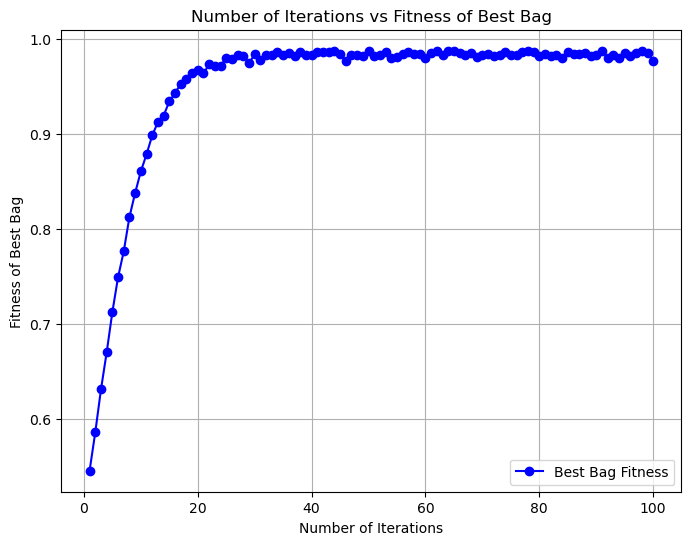

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Combine X and y into a single dataset
data = np.c_[X, y]
# Step 1: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Set the number of bags and the desired bag size range
num_bags = 10
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },    
    
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Define the Teaching-Learning-Based Optimization (TLBO) algorithm
def tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size):
    # Initialize the bags randomly
    bags = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size)) for _ in range(num_bags)]

    # Initialize the initial weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Tracking lists for best bag metrics and fitness
    best_bag_accuracies = []
    best_bag_diversities = []
    best_bag_fitnesses = []

    # Perform TLBO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each bag using 5-fold cross-validation
        for bag in bags:
            X_train_bag, y_train_bag = data[bag, :-1], data[bag, -1]

            ensemble_preds = np.empty((len(X_train_bag), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bag, y_train_bag)
                preds = model.predict(X_train_bag)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bag, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each bag using dynamic weights
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the bag with the best performance
        best_bag_index = np.argmax(fitness)
        best_bag_accuracy = accuracies[best_bag_index]
        best_bag_diversity = diversities[best_bag_index]

        # Append best bag metrics and fitness to tracking lists
        best_bag_accuracies.append(best_bag_accuracy)
        best_bag_diversities.append(best_bag_diversity)
        best_bag_fitnesses.append(fitness)

        # Update the dynamic weights for accuracy and diversity
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Replace the best bag with a new bag randomly sampled from the dataset
        new_bag = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size))
        bags[best_bag_index] = new_bag

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Best Bag Accuracy: {best_bag_accuracy}")
            print(f"Best Bag Diversity (Hamming Distance): {best_bag_diversity}")
            print(f"Best Bag Fitness: {fitness}")
            print(f"Accuracy Weight: {w_acc}")
            print(f"Diversity Weight: {w_div}")
            print()

    # Return the optimized bags and tracking lists
    return bags, best_bag_accuracies, best_bag_diversities, best_bag_fitnesses

# Perform TLBO optimization to get the optimal bags and tracking lists
optimal_bags, best_bag_accuracies, best_bag_diversities, best_bag_fitnesses = tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size)

# Rest of the code for evaluation and plotting remains the same

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal bag
    classifier = clf['model']
    optimal_bag = optimal_bags[idx]
    
    # Train the classifier on the optimal bag (training data)
    classifier.fit(X[optimal_bag], y[optimal_bag])
    
    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)
    
    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of best bag
num_iterations = 100 # Define the number of iterations for the line plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations+1), best_bag_fitnesses, marker='o', color='b', label='Best Bag Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Best Bag')
plt.title('Number of Iterations vs Fitness of Best Bag')
plt.legend()
plt.grid(True)
plt.show()


In [31]:
#HAMMING BEST 5 BAGS 

Iteration 20:
Best Bag Accuracy: 0.9948717948717949
Best Bag Diversity (Hamming Distance): 0.15384615384615385
Best Bag Fitness: 0.9410216761465612
Accuracy Weight: 0.9822491904206394
Diversity Weight: 0.017750809579360517

Iteration 40:
Best Bag Accuracy: 0.9622641509433962
Best Bag Diversity (Hamming Distance): 0.1509433962264151
Best Bag Fitness: 0.948825446349699
Accuracy Weight: 0.9996735240747223
Diversity Weight: 0.0003264759252776931

Iteration 60:
Best Bag Accuracy: 1.0
Best Bag Diversity (Hamming Distance): 0.06870229007633588
Best Bag Fitness: 0.953144324312884
Accuracy Weight: 0.9999940981673082
Diversity Weight: 5.901832691674817e-06

Iteration 80:
Best Bag Accuracy: 0.9276315789473685
Best Bag Diversity (Hamming Distance): 0.125
Best Bag Fitness: 0.9407563526928642
Accuracy Weight: 0.9999998933438515
Diversity Weight: 1.0665614837916577e-07

Iteration 100:
Best Bag Accuracy: 1.0
Best Bag Diversity (Hamming Distance): 0.14042553191489363
Best Bag Fitness: 0.951700724253962

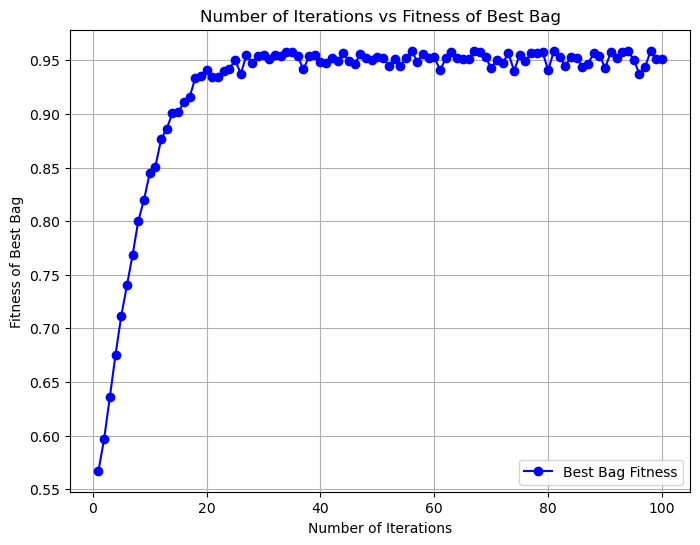

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Combine X and y into a single dataset
data = np.c_[X, y]
# Step 1: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Set the number of bags and the desired bag size range
num_bags = 5
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },    
    
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Define the Teaching-Learning-Based Optimization (TLBO) algorithm
def tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size):
    # Initialize the bags randomly
    bags = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size)) for _ in range(num_bags)]

    # Initialize the initial weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Tracking lists for best bag metrics and fitness
    best_bag_accuracies = []
    best_bag_diversities = []
    best_bag_fitnesses = []

    # Perform TLBO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each bag using 5-fold cross-validation
        for bag in bags:
            X_train_bag, y_train_bag = data[bag, :-1], data[bag, -1]

            ensemble_preds = np.empty((len(X_train_bag), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bag, y_train_bag)
                preds = model.predict(X_train_bag)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bag, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each bag using dynamic weights
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the bag with the best performance
        best_bag_index = np.argmax(fitness)
        best_bag_accuracy = accuracies[best_bag_index]
        best_bag_diversity = diversities[best_bag_index]

        # Append best bag metrics and fitness to tracking lists
        best_bag_accuracies.append(best_bag_accuracy)
        best_bag_diversities.append(best_bag_diversity)
        best_bag_fitnesses.append(fitness)

        # Update the dynamic weights for accuracy and diversity
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Replace the best bag with a new bag randomly sampled from the dataset
        new_bag = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size))
        bags[best_bag_index] = new_bag

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Best Bag Accuracy: {best_bag_accuracy}")
            print(f"Best Bag Diversity (Hamming Distance): {best_bag_diversity}")
            print(f"Best Bag Fitness: {fitness}")
            print(f"Accuracy Weight: {w_acc}")
            print(f"Diversity Weight: {w_div}")
            print()

    # Return the optimized bags and tracking lists
    return bags, best_bag_accuracies, best_bag_diversities, best_bag_fitnesses

# Perform TLBO optimization to get the optimal bags and tracking lists
optimal_bags, best_bag_accuracies, best_bag_diversities, best_bag_fitnesses = tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size)

# Rest of the code for evaluation and plotting remains the same

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal bag
    classifier = clf['model']
    optimal_bag = optimal_bags[idx]
    
    # Train the classifier on the optimal bag (training data)
    classifier.fit(X[optimal_bag], y[optimal_bag])
    
    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)
    
    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of best bag
num_iterations = 100 # Define the number of iterations for the line plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations+1), best_bag_fitnesses, marker='o', color='b', label='Best Bag Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Best Bag')
plt.title('Number of Iterations vs Fitness of Best Bag')
plt.legend()
plt.grid(True)
plt.show()


In [22]:
# bhattacharya best 10 bags

Iteration 20:
Worst Bag Accuracy: 0.9906103286384976
Worst Bag Diversity (Bhattacharyya Distance): 0.32901882592280773
Worst Bag Fitness: 0.9829549912889475
Accuracy Weight: 0.9822491904206394
Diversity Weight: 0.017750809579360517

Iteration 40:
Worst Bag Accuracy: 0.9418604651162791
Worst Bag Diversity (Bhattacharyya Distance): 0.1690612322221663
Worst Bag Fitness: 0.9847013767439036
Accuracy Weight: 0.9996735240747223
Diversity Weight: 0.0003264759252776931

Iteration 60:
Worst Bag Accuracy: 0.9655172413793104
Worst Bag Diversity (Bhattacharyya Distance): 0.34374098132180925
Worst Bag Fitness: 0.9852885929909484
Accuracy Weight: 0.9999940981673082
Diversity Weight: 5.901832691674817e-06

Iteration 80:
Worst Bag Accuracy: 0.9395348837209302
Worst Bag Diversity (Bhattacharyya Distance): 0.12051757415314927
Worst Bag Fitness: 0.9845978493159216
Accuracy Weight: 0.9999998933438515
Diversity Weight: 1.0665614837916577e-07

Iteration 100:
Worst Bag Accuracy: 1.0
Worst Bag Diversity (Bhatt

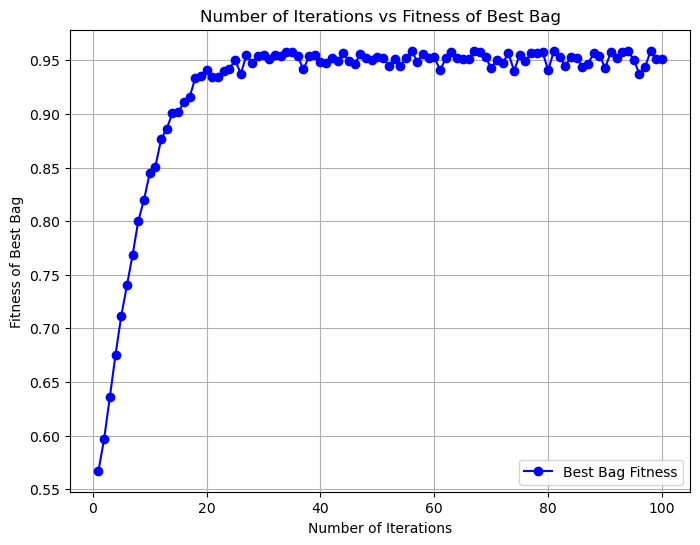

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of bags and the desired bag size range
num_bags = 10
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },    
    
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Calculate Bhattacharyya distance between classifiers' predictions
def bhattacharyya_distance(predictions1, predictions2):
    mean1 = np.mean(predictions1, axis=0)
    mean2 = np.mean(predictions2, axis=0)
    cov1 = np.cov(predictions1, rowvar=False)
    cov2 = np.cov(predictions2, rowvar=False)
    bhattacharyya_coeff = 0.25 * np.dot(np.transpose(mean1 - mean2), np.dot(np.linalg.inv(0.5 * (cov1 + cov2)), mean1 - mean2)) + 0.5 * np.log(np.linalg.det(0.5 * (cov1 + cov2)) / np.sqrt(np.linalg.det(cov1) * np.linalg.det(cov2)))
    bhattacharyya_dist = np.sqrt(1 - np.exp(-bhattacharyya_coeff))
    return bhattacharyya_dist

# Define the Teaching-Learning-Based Optimization (TLBO) algorithm
def tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size):
    # Initialize the bags randomly
    bags = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size)) for _ in range(num_bags)]

    # Initialize the initial weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Tracking lists for worst bag metrics and fitness
    worst_bag_accuracies = []
    worst_bag_diversities = []
    worst_bag_fitnesses = []

    # Perform TLBO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each bag using 5-fold cross-validation
        for bag in bags:
            X_train_bag, y_train_bag = data[bag, :-1], data[bag, -1]

            ensemble_preds = np.empty((len(X_train_bag), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bag, y_train_bag)
                preds = model.predict(X_train_bag)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Bhattacharyya distance between classifiers' predictions
            diversity = bhattacharyya_distance(ensemble_preds[:, 1:], ensemble_preds[:, :-1])

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bag, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each bag using dynamic weights
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the bag with the worst performance
        worst_bag_index = np.argmin(fitness)
        worst_bag_accuracy = accuracies[worst_bag_index]
        worst_bag_diversity = diversities[worst_bag_index]

        # Append worst bag metrics and fitness to tracking lists
        worst_bag_accuracies.append(worst_bag_accuracy)
        worst_bag_diversities.append(worst_bag_diversity)
        worst_bag_fitnesses.append(fitness)

        # Update the dynamic weights for accuracy and diversity
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Replace the worst bag with a new bag randomly sampled from the dataset
        new_bag = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size))
        bags[worst_bag_index] = new_bag

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Bag Accuracy: {worst_bag_accuracy}")
            print(f"Worst Bag Diversity (Bhattacharyya Distance): {worst_bag_diversity}")
            print(f"Worst Bag Fitness: {fitness}")
            print(f"Accuracy Weight: {w_acc}")
            print(f"Diversity Weight: {w_div}")
            print()

    # Return the optimized bags and tracking lists
    return bags, worst_bag_accuracies, worst_bag_diversities, worst_bag_fitnesses

# Perform TLBO optimization to get the optimal bags and tracking lists
optimal_bags, worst_bag_accuracies, worst_bag_diversities, worst_bag_fitnesses = tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size)
# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of best bag
num_iterations = 100 # Define the number of iterations for the line plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations+1), best_bag_fitnesses, marker='o', color='b', label='Best Bag Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Best Bag')
plt.title('Number of Iterations vs Fitness of Best Bag')
plt.legend()
plt.grid(True)
plt.show()




In [24]:
#bhattacharya best 5 bags

Iteration 20:
Worst Bag Accuracy: 1.0
Worst Bag Diversity (Bhattacharyya Distance): 1.0
Worst Bag Fitness: 0.9645250437665981
Accuracy Weight: 0.9822491904206394
Diversity Weight: 0.017750809579360517

Iteration 40:
Worst Bag Accuracy: 0.9671052631578947
Worst Bag Diversity (Bhattacharyya Distance): 0.027206161246944537
Worst Bag Fitness: 0.9680690501420219
Accuracy Weight: 0.9996735240747223
Diversity Weight: 0.0003264759252776931

Iteration 60:
Worst Bag Accuracy: 0.9752475247524752
Worst Bag Diversity (Bhattacharyya Distance): 0.10009939700814093
Worst Bag Fitness: 0.9675892423148591
Accuracy Weight: 0.9999940981673082
Diversity Weight: 5.901832691674817e-06

Iteration 80:
Worst Bag Accuracy: 1.0
Worst Bag Diversity (Bhattacharyya Distance): 1.0
Worst Bag Fitness: 0.9737356585564798
Accuracy Weight: 0.9999998933438515
Diversity Weight: 1.0665614837916577e-07

Iteration 100:
Worst Bag Accuracy: 0.9743589743589743
Worst Bag Diversity (Bhattacharyya Distance): 0.04546811478381728
Worst

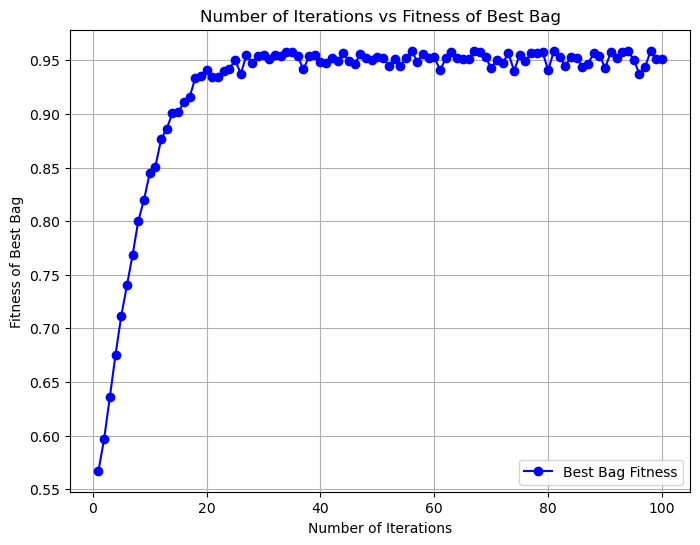

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of bags and the desired bag size range
num_bags = 5
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },    
    
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Calculate Bhattacharyya distance between classifiers' predictions
def bhattacharyya_distance(predictions1, predictions2):
    mean1 = np.mean(predictions1, axis=0)
    mean2 = np.mean(predictions2, axis=0)
    cov1 = np.cov(predictions1, rowvar=False)
    cov2 = np.cov(predictions2, rowvar=False)
    bhattacharyya_coeff = 0.25 * np.dot(np.transpose(mean1 - mean2), np.dot(np.linalg.inv(0.5 * (cov1 + cov2)), mean1 - mean2)) + 0.5 * np.log(np.linalg.det(0.5 * (cov1 + cov2)) / np.sqrt(np.linalg.det(cov1) * np.linalg.det(cov2)))
    bhattacharyya_dist = np.sqrt(1 - np.exp(-bhattacharyya_coeff))
    return bhattacharyya_dist

# Define the Teaching-Learning-Based Optimization (TLBO) algorithm
def tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size):
    # Initialize the bags randomly
    bags = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size)) for _ in range(num_bags)]

    # Initialize the initial weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Tracking lists for worst bag metrics and fitness
    worst_bag_accuracies = []
    worst_bag_diversities = []
    worst_bag_fitnesses = []

    # Perform TLBO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each bag using 5-fold cross-validation
        for bag in bags:
            X_train_bag, y_train_bag = data[bag, :-1], data[bag, -1]

            ensemble_preds = np.empty((len(X_train_bag), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bag, y_train_bag)
                preds = model.predict(X_train_bag)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Bhattacharyya distance between classifiers' predictions
            diversity = bhattacharyya_distance(ensemble_preds[:, 1:], ensemble_preds[:, :-1])

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bag, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each bag using dynamic weights
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the bag with the worst performance
        worst_bag_index = np.argmin(fitness)
        worst_bag_accuracy = accuracies[worst_bag_index]
        worst_bag_diversity = diversities[worst_bag_index]

        # Append worst bag metrics and fitness to tracking lists
        worst_bag_accuracies.append(worst_bag_accuracy)
        worst_bag_diversities.append(worst_bag_diversity)
        worst_bag_fitnesses.append(fitness)

        # Update the dynamic weights for accuracy and diversity
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Replace the worst bag with a new bag randomly sampled from the dataset
        new_bag = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size))
        bags[worst_bag_index] = new_bag

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Bag Accuracy: {worst_bag_accuracy}")
            print(f"Worst Bag Diversity (Bhattacharyya Distance): {worst_bag_diversity}")
            print(f"Worst Bag Fitness: {fitness}")
            print(f"Accuracy Weight: {w_acc}")
            print(f"Diversity Weight: {w_div}")
            print()

    # Return the optimized bags and tracking lists
    return bags, worst_bag_accuracies, worst_bag_diversities, worst_bag_fitnesses

# Perform TLBO optimization to get the optimal bags and tracking lists
optimal_bags, worst_bag_accuracies, worst_bag_diversities, worst_bag_fitnesses = tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size)
# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of best bag
num_iterations = 100 # Define the number of iterations for the line plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations+1), best_bag_fitnesses, marker='o', color='b', label='Best Bag Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Best Bag')
plt.title('Number of Iterations vs Fitness of Best Bag')
plt.legend()
plt.grid(True)
plt.show()



In [26]:
# bhattacharya 10 bags worst

Iteration 20:
Worst Bag Accuracy: 1.0
Worst Bag Diversity (Bhattacharyya Distance): 1.0
Worst Bag Fitness: 0.970770045562244
Accuracy Weight: 0.9822491904206394
Diversity Weight: 0.017750809579360517

Iteration 40:
Worst Bag Accuracy: 0.9683544303797469
Worst Bag Diversity (Bhattacharyya Distance): 0.1012299941019081
Worst Bag Fitness: 0.9783809560690392
Accuracy Weight: 0.9996735240747223
Diversity Weight: 0.0003264759252776931

Iteration 60:
Worst Bag Accuracy: 0.9294117647058824
Worst Bag Diversity (Bhattacharyya Distance): 0.044402074906289925
Worst Bag Fitness: 0.9738988572538937
Accuracy Weight: 0.9999940981673082
Diversity Weight: 5.901832691674817e-06

Iteration 80:
Worst Bag Accuracy: 0.9712643678160919
Worst Bag Diversity (Bhattacharyya Distance): 0.07286552765068711
Worst Bag Fitness: 0.978864199916867
Accuracy Weight: 0.9999998933438515
Diversity Weight: 1.0665614837916577e-07

Iteration 100:
Worst Bag Accuracy: 1.0
Worst Bag Diversity (Bhattacharyya Distance): 1.0
Worst Ba

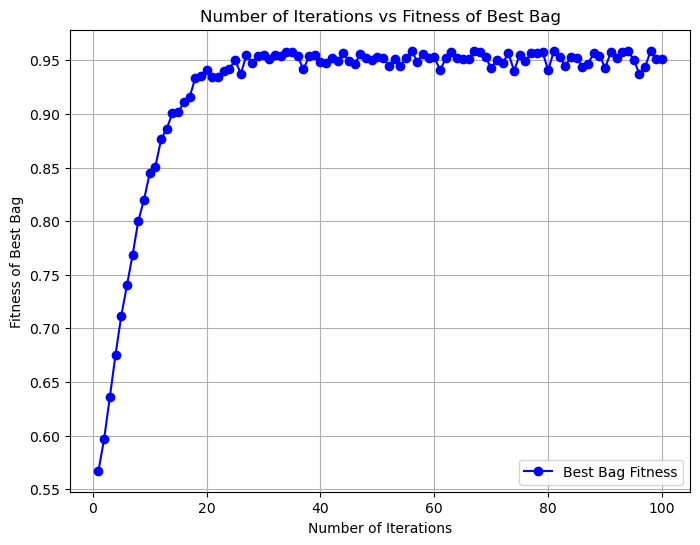

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of bags and the desired bag size range
num_bags = 10
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },    
    
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Calculate Bhattacharyya distance between classifiers' predictions
def bhattacharyya_distance(predictions1, predictions2):
    mean1 = np.mean(predictions1, axis=0)
    mean2 = np.mean(predictions2, axis=0)
    cov1 = np.cov(predictions1, rowvar=False)
    cov2 = np.cov(predictions2, rowvar=False)
    bhattacharyya_coeff = 0.25 * np.dot(np.transpose(mean1 - mean2), np.dot(np.linalg.inv(0.5 * (cov1 + cov2)), mean1 - mean2)) + 0.5 * np.log(np.linalg.det(0.5 * (cov1 + cov2)) / np.sqrt(np.linalg.det(cov1) * np.linalg.det(cov2)))
    bhattacharyya_dist = np.sqrt(1 - np.exp(-bhattacharyya_coeff))
    return bhattacharyya_dist

# Define the Teaching-Learning-Based Optimization (TLBO) algorithm
def tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size):
    # Initialize the bags randomly
    bags = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size)) for _ in range(num_bags)]

    # Initialize the initial weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Tracking lists for worst bag metrics and fitness
    worst_bag_accuracies = []
    worst_bag_diversities = []
    worst_bag_fitnesses = []

    # Perform TLBO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each bag using 5-fold cross-validation
        for bag in bags:
            X_train_bag, y_train_bag = data[bag, :-1], data[bag, -1]

            ensemble_preds = np.empty((len(X_train_bag), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bag, y_train_bag)
                preds = model.predict(X_train_bag)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Bhattacharyya distance between classifiers' predictions
            diversity = bhattacharyya_distance(ensemble_preds[:, 1:], ensemble_preds[:, :-1])

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bag, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each bag using dynamic weights
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the bag with the worst performance
        worst_bag_index = np.argmax(fitness)
        worst_bag_accuracy = accuracies[worst_bag_index]
        worst_bag_diversity = diversities[worst_bag_index]

        # Append worst bag metrics and fitness to tracking lists
        worst_bag_accuracies.append(worst_bag_accuracy)
        worst_bag_diversities.append(worst_bag_diversity)
        worst_bag_fitnesses.append(fitness)

        # Update the dynamic weights for accuracy and diversity
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Replace the worst bag with a new bag randomly sampled from the dataset
        new_bag = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size))
        bags[worst_bag_index] = new_bag

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Bag Accuracy: {worst_bag_accuracy}")
            print(f"Worst Bag Diversity (Bhattacharyya Distance): {worst_bag_diversity}")
            print(f"Worst Bag Fitness: {fitness}")
            print(f"Accuracy Weight: {w_acc}")
            print(f"Diversity Weight: {w_div}")
            print()

    # Return the optimized bags and tracking lists
    return bags, worst_bag_accuracies, worst_bag_diversities, worst_bag_fitnesses

# Perform TLBO optimization to get the optimal bags and tracking lists
optimal_bags, worst_bag_accuracies, worst_bag_diversities, worst_bag_fitnesses = tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size)
# Perform TLBO optimization to get the optimal bags and tracking lists
optimal_bags, worst_bag_accuracies, worst_bag_diversities, worst_bag_fitnesses = tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size)
# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of best bag
num_iterations = 100 # Define the number of iterations for the line plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations+1), best_bag_fitnesses, marker='o', color='b', label='Best Bag Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Best Bag')
plt.title('Number of Iterations vs Fitness of Best Bag')
plt.legend()
plt.grid(True)
plt.show()


In [28]:
#bhattacharya 5 bags worst

In [ ]:
#entropy 5 bags worst

Iteration 20:
Worst Bag Accuracy: 0.9518072289156626
Worst Bag Diversity (Entropy): 5.0971188123033535
Worst Bag Fitness: 5.119925394382572
Accuracy Weight: 0.017750809579360517
Diversity Weight: 0.9822491904206394

Iteration 40:
Worst Bag Accuracy: 0.8993288590604027
Worst Bag Diversity (Entropy): 4.969030448965358
Worst Bag Fitness: 5.197026007394234
Accuracy Weight: 0.0003264759252776931
Diversity Weight: 0.9996735240747223

Iteration 60:
Worst Bag Accuracy: 1.0
Worst Bag Diversity (Entropy): 5.573814976429546
Worst Bag Fitness: 5.259161761620844
Accuracy Weight: 5.901832691674817e-06
Diversity Weight: 0.9999940981673082

Iteration 80:
Worst Bag Accuracy: 1.0
Worst Bag Diversity (Entropy): 5.578797632801462
Worst Bag Fitness: 5.259683280982814
Accuracy Weight: 1.0665614837916577e-07
Diversity Weight: 0.9999998933438515

Iteration 100:
Worst Bag Accuracy: 0.9935064935064936
Worst Bag Diversity (Entropy): 5.030001495847642
Worst Bag Fitness: 5.204918894936026
Accuracy Weight: 1.927446

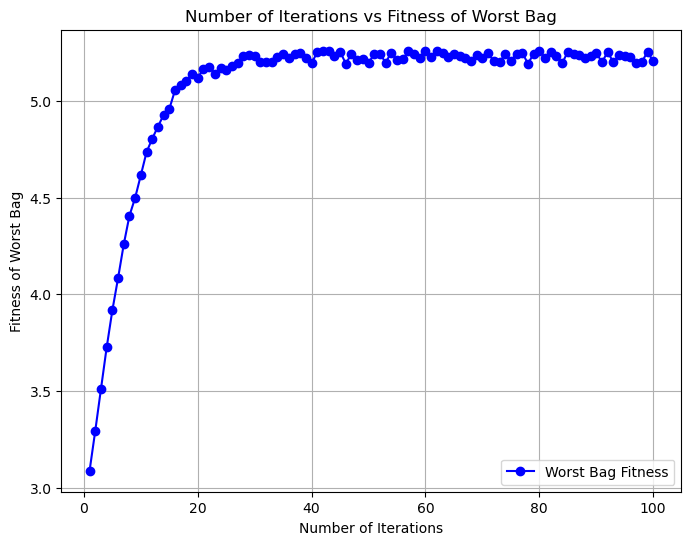

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from scipy.stats import entropy
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of bags and the desired bag size range
num_bags = 10
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'LR': {
        'model': LogisticRegression(),
        'param_grid': {'C': [0.1, 1, 10]}
    },    
    
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Define the Teaching-Learning-Based Optimization (TLBO) algorithm
def tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size):
    # Initialize the bags randomly
    bags = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size)) for _ in range(num_bags)]

    # Initialize the initial weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Tracking lists for worst bag metrics and fitness
    worst_bag_accuracies = []
    worst_bag_diversities = []
    worst_bag_fitnesses = []

    # Perform TLBO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each bag using 5-fold cross-validation
        for bag in bags:
            X_train_bag, y_train_bag = data[bag, :-1], data[bag, -1]

            ensemble_preds = np.empty((len(X_train_bag), len(classifiers)))
            entropies = np.zeros(len(classifiers))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bag, y_train_bag)
                preds = model.predict(X_train_bag)
                ensemble_preds[:, idx] = preds

                # Calculate entropy for each classifier's predictions
                class_probabilities = np.mean(ensemble_preds[:, idx] == preds.reshape(-1, 1), axis=0)
                entropies[idx] = entropy(class_probabilities)

            # Calculate diversity as average entropy of classifiers' predictions
            diversity = np.mean(entropies)

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bag, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each bag using dynamic weights
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the bag with the worst performance
        worst_bag_index = np.argmin(fitness)
        worst_bag_accuracy = accuracies[worst_bag_index]
        worst_bag_diversity = diversities[worst_bag_index]

        # Append worst bag metrics and fitness to tracking lists
        worst_bag_accuracies.append(worst_bag_accuracy)
        worst_bag_diversities.append(worst_bag_diversity)
        worst_bag_fitnesses.append(fitness)

        # Update the dynamic weights for accuracy and diversity
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Replace the worst bag with a new bag randomly sampled from the dataset
        new_bag = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size))
        bags[worst_bag_index] = new_bag

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Bag Accuracy: {worst_bag_accuracy}")
            print(f"Worst Bag Diversity (Entropy): {worst_bag_diversity}")
            print(f"Worst Bag Fitness: {fitness}")
            print(f"Accuracy Weight: {w_acc}")
            print(f"Diversity Weight: {w_div}")
            print()


    # Return the optimized bags and tracking lists
    return bags, worst_bag_accuracies, worst_bag_diversities, worst_bag_fitnesses

# Perform TLBO optimization to get the optimal bags and tracking lists
optimal_bags, worst_bag_accuracies, worst_bag_diversities, worst_bag_fitnesses = tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size)

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal bag
    classifier = clf['model']
    optimal_bag = optimal_bags[idx]
    
    # Train the classifier on the optimal bag (training data)
    classifier.fit(X[optimal_bag], y[optimal_bag])
    
    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)
    
    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of worst bag
num_iterations = 100  # Define the number of iterations for the line plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations+1), worst_bag_fitnesses, marker='o', color='b', label='Worst Bag Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Bag')
plt.title('Number of Iterations vs Fitness of Worst Bag')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of bags and the desired bag size range
num_bags = 10
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },    
    
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Calculate Bhattacharyya distance between classifiers' predictions
def bhattacharyya_distance(predictions1, predictions2):
    mean1 = np.mean(predictions1, axis=0)
    mean2 = np.mean(predictions2, axis=0)
    cov1 = np.cov(predictions1, rowvar=False)
    cov2 = np.cov(predictions2, rowvar=False)
    bhattacharyya_coeff = 0.25 * np.dot(np.transpose(mean1 - mean2), np.dot(np.linalg.inv(0.5 * (cov1 + cov2)), mean1 - mean2)) + 0.5 * np.log(np.linalg.det(0.5 * (cov1 + cov2)) / np.sqrt(np.linalg.det(cov1) * np.linalg.det(cov2)))
    bhattacharyya_dist = np.sqrt(1 - np.exp(-bhattacharyya_coeff))
    return bhattacharyya_dist

# Define the Teaching-Learning-Based Optimization (TLBO) algorithm
def tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size):
    # Initialize the bags randomly
    bags = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size)) for _ in range(num_bags)]

    # Initialize the initial weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Tracking lists for worst bag metrics and fitness
    worst_bag_accuracies = []
    worst_bag_diversities = []
    worst_bag_fitnesses = []

    # Perform TLBO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each bag using 5-fold cross-validation
        for bag in bags:
            X_train_bag, y_train_bag = data[bag, :-1], data[bag, -1]

            ensemble_preds = np.empty((len(X_train_bag), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bag, y_train_bag)
                preds = model.predict(X_train_bag)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Bhattacharyya distance between classifiers' predictions
            diversity = bhattacharyya_distance(ensemble_preds[:, 1:], ensemble_preds[:, :-1])

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bag, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each bag using dynamic weights
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the bag with the worst performance
        worst_bag_index = np.argmin(fitness)
        worst_bag_accuracy = accuracies[worst_bag_index]
        worst_bag_diversity = diversities[worst_bag_index]

        # Append worst bag metrics and fitness to tracking lists
        worst_bag_accuracies.append(worst_bag_accuracy)
        worst_bag_diversities.append(worst_bag_diversity)
        worst_bag_fitnesses.append(fitness)

        # Update the dynamic weights for accuracy and diversity
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Replace the worst bag with a new bag randomly sampled from the dataset
        new_bag = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size))
        bags[worst_bag_index] = new_bag

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Bag Accuracy: {worst_bag_accuracy}")
            print(f"Worst Bag Diversity (Bhattacharyya Distance): {worst_bag_diversity}")
            print(f"Worst Bag Fitness: {fitness}")
            print(f"Accuracy Weight: {w_acc}")
            print(f"Diversity Weight: {w_div}")
            
            print()

    # Return the optimized bags and tracking lists
    return bags, worst_bag_accuracies, worst_bag_diversities, worst_bag_fitnesses

# Perform TLBO optimization to get the optimal bags and tracking lists
optimal_bags, worst_bag_accuracies, worst_bag_diversities, worst_bag_fitnesses = tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size)
# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of best bag
num_iterations = 100 # Define the number of iterations for the line plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations+1), best_bag_fitnesses, marker='o', color='b', label='Best Bag Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Best Bag')
plt.title('Number of Iterations vs Fitness of Best Bag')
plt.legend()
plt.grid(True)
plt.show()


# Calculate the ROC curve for the ensemble predictions
fpr, tpr, thresholds = roc_curve(y_test, ensemble_preds_majority)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of bags and the desired bag size range
num_bags = 5
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },    
    
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Calculate Bhattacharyya distance between classifiers' predictions
def bhattacharyya_distance(predictions1, predictions2):
    mean1 = np.mean(predictions1, axis=0)
    mean2 = np.mean(predictions2, axis=0)
    cov1 = np.cov(predictions1, rowvar=False)
    cov2 = np.cov(predictions2, rowvar=False)
    bhattacharyya_coeff = 0.25 * np.dot(np.transpose(mean1 - mean2), np.dot(np.linalg.inv(0.5 * (cov1 + cov2)), mean1 - mean2)) + 0.5 * np.log(np.linalg.det(0.5 * (cov1 + cov2)) / np.sqrt(np.linalg.det(cov1) * np.linalg.det(cov2)))
    bhattacharyya_dist = np.sqrt(1 - np.exp(-bhattacharyya_coeff))
    return bhattacharyya_dist

# Define the Teaching-Learning-Based Optimization (TLBO) algorithm
def tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size):
    # Initialize the bags randomly
    bags = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size)) for _ in range(num_bags)]

    # Initialize the initial weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Tracking lists for worst bag metrics and fitness
    worst_bag_accuracies = []
    worst_bag_diversities = []
    worst_bag_fitnesses = []

    # Perform TLBO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each bag using 5-fold cross-validation
        for bag in bags:
            X_train_bag, y_train_bag = data[bag, :-1], data[bag, -1]

            ensemble_preds = np.empty((len(X_train_bag), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bag, y_train_bag)
                preds = model.predict(X_train_bag)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Bhattacharyya distance between classifiers' predictions
            diversity = bhattacharyya_distance(ensemble_preds[:, 1:], ensemble_preds[:, :-1])

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bag, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each bag using dynamic weights
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the bag with the worst performance
        worst_bag_index = np.argmin(fitness)
        worst_bag_accuracy = accuracies[worst_bag_index]
        worst_bag_diversity = diversities[worst_bag_index]

        # Append worst bag metrics and fitness to tracking lists
        worst_bag_accuracies.append(worst_bag_accuracy)
        worst_bag_diversities.append(worst_bag_diversity)
        worst_bag_fitnesses.append(fitness)

        # Update the dynamic weights for accuracy and diversity
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Replace the worst bag with a new bag randomly sampled from the dataset
        new_bag = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size))
        bags[worst_bag_index] = new_bag

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Bag Accuracy: {worst_bag_accuracy}")
            print(f"Worst Bag Diversity (Bhattacharyya Distance): {worst_bag_diversity}")
            print(f"Worst Bag Fitness: {fitness}")
            print(f"Accuracy Weight: {w_acc}")
            print(f"Diversity Weight: {w_div}")
            
            print()

    # Return the optimized bags and tracking lists
    return bags, worst_bag_accuracies, worst_bag_diversities, worst_bag_fitnesses

# Perform TLBO optimization to get the optimal bags and tracking lists
optimal_bags, worst_bag_accuracies, worst_bag_diversities, worst_bag_fitnesses = tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size)
# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of best bag
num_iterations = 100 # Define the number of iterations for the line plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations+1), best_bag_fitnesses, marker='o', color='b', label='Best Bag Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Best Bag')
plt.title('Number of Iterations vs Fitness of Best Bag')
plt.legend()
plt.grid(True)
plt.show()


# Calculate the ROC curve for the ensemble predictions
fpr, tpr, thresholds = roc_curve(y_test, ensemble_preds_majority)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of bags and the desired bag size range
num_bags = 10
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },    
    
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Calculate Bhattacharyya distance between classifiers' predictions
def bhattacharyya_distance(predictions1, predictions2):
    mean1 = np.mean(predictions1, axis=0)
    mean2 = np.mean(predictions2, axis=0)
    cov1 = np.cov(predictions1, rowvar=False)
    cov2 = np.cov(predictions2, rowvar=False)
    bhattacharyya_coeff = 0.25 * np.dot(np.transpose(mean1 - mean2), np.dot(np.linalg.inv(0.5 * (cov1 + cov2)), mean1 - mean2)) + 0.5 * np.log(np.linalg.det(0.5 * (cov1 + cov2)) / np.sqrt(np.linalg.det(cov1) * np.linalg.det(cov2)))
    bhattacharyya_dist = np.sqrt(1 - np.exp(-bhattacharyya_coeff))
    return bhattacharyya_dist

# Define the Teaching-Learning-Based Optimization (TLBO) algorithm
def tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size):
    # Initialize the bags randomly
    bags = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size)) for _ in range(num_bags)]

    # Initialize the initial weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Tracking lists for worst bag metrics and fitness
    worst_bag_accuracies = []
    worst_bag_diversities = []
    worst_bag_fitnesses = []

    # Perform TLBO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each bag using 5-fold cross-validation
        for bag in bags:
            X_train_bag, y_train_bag = data[bag, :-1], data[bag, -1]

            ensemble_preds = np.empty((len(X_train_bag), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bag, y_train_bag)
                preds = model.predict(X_train_bag)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Bhattacharyya distance between classifiers' predictions
            diversity = bhattacharyya_distance(ensemble_preds[:, 1:], ensemble_preds[:, :-1])

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bag, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each bag using dynamic weights
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the bag with the worst performance
        worst_bag_index = np.argmax(fitness)
        worst_bag_accuracy = accuracies[worst_bag_index]
        worst_bag_diversity = diversities[worst_bag_index]

        # Append worst bag metrics and fitness to tracking lists
        worst_bag_accuracies.append(worst_bag_accuracy)
        worst_bag_diversities.append(worst_bag_diversity)
        worst_bag_fitnesses.append(fitness)

        # Update the dynamic weights for accuracy and diversity
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Replace the worst bag with a new bag randomly sampled from the dataset
        new_bag = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size))
        bags[worst_bag_index] = new_bag

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Bag Accuracy: {worst_bag_accuracy}")
            print(f"Worst Bag Diversity (Bhattacharyya Distance): {worst_bag_diversity}")
            print(f"Worst Bag Fitness: {fitness}")
            print()

    # Return the optimized bags and tracking lists
    return bags, worst_bag_accuracies, worst_bag_diversities, worst_bag_fitnesses

# Perform TLBO optimization to get the optimal bags and tracking lists
optimal_bags, worst_bag_accuracies, worst_bag_diversities, worst_bag_fitnesses = tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size)
# Perform TLBO optimization to get the optimal bags and tracking lists
optimal_bags, worst_bag_accuracies, worst_bag_diversities, worst_bag_fitnesses = tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size)
# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of best bag
num_iterations = 100 # Define the number of iterations for the line plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations+1), best_bag_fitnesses, marker='o', color='b', label='Best Bag Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Best Bag')
plt.title('Number of Iterations vs Fitness of Best Bag')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of bags and the desired bag size range
num_bags = 5
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },    
    
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Calculate Bhattacharyya distance between classifiers' predictions
def bhattacharyya_distance(predictions1, predictions2):
    mean1 = np.mean(predictions1, axis=0)
    mean2 = np.mean(predictions2, axis=0)
    cov1 = np.cov(predictions1, rowvar=False)
    cov2 = np.cov(predictions2, rowvar=False)
    bhattacharyya_coeff = 0.25 * np.dot(np.transpose(mean1 - mean2), np.dot(np.linalg.inv(0.5 * (cov1 + cov2)), mean1 - mean2)) + 0.5 * np.log(np.linalg.det(0.5 * (cov1 + cov2)) / np.sqrt(np.linalg.det(cov1) * np.linalg.det(cov2)))
    bhattacharyya_dist = np.sqrt(1 - np.exp(-bhattacharyya_coeff))
    return bhattacharyya_dist

# Define the Teaching-Learning-Based Optimization (TLBO) algorithm
def tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size):
    # Initialize the bags randomly
    bags = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size)) for _ in range(num_bags)]

    # Initialize the initial weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Tracking lists for worst bag metrics and fitness
    worst_bag_accuracies = []
    worst_bag_diversities = []
    worst_bag_fitnesses = []

    # Perform TLBO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each bag using 5-fold cross-validation
        for bag in bags:
            X_train_bag, y_train_bag = data[bag, :-1], data[bag, -1]

            ensemble_preds = np.empty((len(X_train_bag), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bag, y_train_bag)
                preds = model.predict(X_train_bag)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Bhattacharyya distance between classifiers' predictions
            diversity = bhattacharyya_distance(ensemble_preds[:, 1:], ensemble_preds[:, :-1])

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bag, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each bag using dynamic weights
        fitness = np.mean(accuracies) * w_acc + np.mean(diversities) * w_div

        # Identify the bag with the worst performance
        worst_bag_index = np.argmax(fitness)
        worst_bag_accuracy = accuracies[worst_bag_index]
        worst_bag_diversity = diversities[worst_bag_index]

        # Append worst bag metrics and fitness to tracking lists
        worst_bag_accuracies.append(worst_bag_accuracy)
        worst_bag_diversities.append(worst_bag_diversity)
        worst_bag_fitnesses.append(fitness)

        # Update the dynamic weights for accuracy and diversity
        if np.mean(accuracies) > np.mean(diversities):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Replace the worst bag with a new bag randomly sampled from the dataset
        new_bag = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size))
        bags[worst_bag_index] = new_bag

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Bag Accuracy: {worst_bag_accuracy}")
            print(f"Worst Bag Diversity (Bhattacharyya Distance): {worst_bag_diversity}")
            print(f"Worst Bag Fitness: {fitness}")
            print()

    # Return the optimized bags and tracking lists
    return bags, worst_bag_accuracies, worst_bag_diversities, worst_bag_fitnesses

# Perform TLBO optimization to get the optimal bags and tracking lists
optimal_bags, worst_bag_accuracies, worst_bag_diversities, worst_bag_fitnesses = tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size)
# Perform TLBO optimization to get the optimal bags and tracking lists
optimal_bags, worst_bag_accuracies, worst_bag_diversities, worst_bag_fitnesses = tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size)
# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of best bag
num_iterations = 100 # Define the number of iterations for the line plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations+1), best_bag_fitnesses, marker='o', color='b', label='Best Bag Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Best Bag')
plt.title('Number of Iterations vs Fitness of Best Bag')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from itertools import combinations

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of bags and the desired bag size range
num_bags = 5
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },    
    
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Calculate Q statistics between classifiers' predictions
def q_statistics(predictions):
    num_classifiers = predictions.shape[1]
    num_instances = predictions.shape[0]
    q_stat = 0.0
    
    for i, j in combinations(range(num_classifiers), 2):
        q_stat += np.sum(predictions[:, i] != predictions[:, j]) / num_instances
    
    q_stat /= (num_classifiers * (num_classifiers - 1)) / 2
    return q_stat

# Define the Teaching-Learning-Based Optimization (TLBO) algorithm
def tlbo_optimization(data, classifiers, num_bags, min_bag_size, max_bag_size):
    # Initialize the bags randomly
    bags = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size)) for _ in range(num_bags)]

    # Initialize the initial weights for accuracy and diversity
    w_acc = 0.5
    w_div = 0.5

    # Tracking lists for worst bag metrics and fitness
    worst_bag_accuracies = []
    worst_bag_q_stats = []  # List to store the Q statistics for worst bags
    worst_bag_fitnesses = []

    # Perform TLBO optimization
    num_iterations = 100
    for iteration in range(num_iterations):
        accuracies = []
        q_stats = []  # List to store the Q statistics for each bag

        # Train and evaluate each bag using 5-fold cross-validation
        for bag in bags:
            X_train_bag, y_train_bag = data[bag, :-1], data[bag, -1]

            ensemble_preds = np.empty((len(X_train_bag), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_bag, y_train_bag)
                preds = model.predict(X_train_bag)
                ensemble_preds[:, idx] = preds

            # Calculate Q statistics
            q_stat = q_statistics(ensemble_preds)
            q_stats.append(q_stat)

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_bag, ensemble_preds_majority)

            accuracies.append(accuracy)

        # Calculate fitness for each bag using dynamic weights
        fitness = np.mean(accuracies) * w_acc + np.mean(q_stats) * w_div

        # Identify the bag with the worst performance
        worst_bag_index = np.argmax(fitness)
        worst_bag_accuracy = accuracies[worst_bag_index]
        worst_bag_q_stat = q_stats[worst_bag_index]

        # Append worst bag metrics and fitness to tracking lists
        worst_bag_accuracies.append(worst_bag_accuracy)
        worst_bag_q_stats.append(worst_bag_q_stat)
        worst_bag_fitnesses.append(fitness)

        # Update the dynamic weights for accuracy and diversity
        if np.mean(accuracies) > np.mean(q_stats):
            w_acc *= 1.1  # Increase weight for accuracy
            w_div *= 0.9  # Decrease weight for diversity
        else:
            w_acc *= 0.9  # Decrease weight for accuracy
            w_div *= 1.1  # Increase weight for diversity

        # Normalize the weights to ensure they sum up to 1
        total_weight = w_acc + w_div
        w_acc /= total_weight
        w_div /= total_weight

        # Replace the worst bag with a new bag randomly sampled from the dataset
        new_bag = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size))
        bags[worst_bag_index] = new_bag

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Bag Accuracy: {worst_bag_accuracy}")
            print(f"Worst Bag Q Statistics: {worst_bag_q_stat}")
            print(f"Worst Bag Fitness: {fitness}")
            print()

    # Return the optimized bags and tracking lists
    return bags, worst_bag_accuracies, worst_bag_q_stats, worst_bag_fitnesses

 Rest of the code for evaluation and plotting remains the same

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal bag
    classifier = clf['model']
    optimal_bag = optimal_bags[idx]
    
    # Train the classifier on the optimal bag (training data)
    classifier.fit(X[optimal_bag], y[optimal_bag])
    
    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)
    
    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)

# Line plot for number of iterations vs fitness of worst bag
num_iterations = 100 # Define the number of iterations for the line plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations+1), worst_bag_fitnesses, marker='o', color='b', label='Worst Bag Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Bag')
plt.title('Number of Iterations vs Fitness of Worst Bag')
plt.legend()
plt.grid(True)
plt.show()
